***Predicting the English Premier League***

Tutorial by Christopher Cole and Daniel Levy

The English Premier League (referred to as the EPL) is the top level of the English football system. Throughout time the game of football has drastically changed, and there now exists countless statistics used to analyze the game. Data science has become very essential to sports teams as they try to find the hidden and important statistics which can help lead to wins. Using all EPL games from the past 10 seasons we will analyze the different factors which contribute to whether a team wins or loses. We will determine the specific stats which determine the outcome of the game. Our overall goal is to use the different patterns and statistics in order to predict the next winner of the EPL. 




## Data Curation 



**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import figure

In our Data Curation section, we are gathering all of our data and putting them inside of panda data frames. The CSV data collected comes datahub, which has data a dataset from every single single EPL season from the past 10 seasons. Originally, each dataset has 62 different statistics, and shows the outcome from every game that season.

  Our first step is cutting down the number of statistics, and choose what we believe are the most key statistics in order to predict the league champion. 
We decided that the 4 most important stats per each game are the following: Shots, shots on target, number of fouls, and the outcome of the game. After creating a new dataframe consisting of just these key statistics, our next step is to split the data so that each EPL team will have its own dataframe. As a result, each EPL team has a dataframe per season, which consists of the result of each of its games and the 4 key stats as the additional columns. 

**Reading in all the data**

In [ ]:

  
df1 = pd.read_csv('season-1819_csv.csv')
df2 = pd.read_csv('season-1718_csv.csv')
df3 = pd.read_csv('season-1617_csv.csv')
df4 = pd.read_csv('season-1516_csv.csv')
df5 = pd.read_csv('season-1415_csv.csv')
df6 = pd.read_csv('season-1314_csv.csv')
df7 = pd.read_csv('season-1213_csv.csv')
df8 = pd.read_csv('season-1112_csv.csv')
df9 = pd.read_csv('season-1011_csv.csv')
df10 = pd.read_csv('season-0910_csv.csv')

#Creating a dataframe of each data from each season
df_list = []
df_list.append(df1)
df_list.append(df2)
df_list.append(df3)
df_list.append(df4)
df_list.append(df5)
df_list.append(df6)
df_list.append(df7)
df_list.append(df8)
df_list.append(df9)
df_list.append(df10)

df1.head()


Div        Date      HomeTeam        AwayTeam  ...  BbAvAHA  PSCH  PSCD  PSCA
0  E0  10/08/2018    Man United       Leicester  ...     2.21  1.55  4.07  7.69
1  E0  11/08/2018   Bournemouth         Cardiff  ...     1.75  1.88  3.61  4.70
2  E0  11/08/2018        Fulham  Crystal Palace  ...     1.77  2.62  3.38  2.90
3  E0  11/08/2018  Huddersfield         Chelsea  ...     2.06  7.24  3.95  1.58
4  E0  11/08/2018     Newcastle       Tottenham  ...     1.76  4.74  3.53  1.89

[5 rows x 62 columns]

**Splitting each team's data in its own data frame**

In [ ]:
teams = set()
teams_df = {}

for df in df_list:
  for index, row in df.iterrows():
    team = row['HomeTeam']
    if team not in teams:
      teams.add(team)
#going through each teams data and putting in into its own dataframe
for team in teams:
  rows = []
  for df in df_list:
    for index, row in df.iterrows():
      home_team, away_team = row['HomeTeam'], row['AwayTeam']
      r = []

      if team == home_team:
        win = row['FTR']
        HS = row['HS']
        HST = row['HST']
        HF = row['HF']  
        r.append(HS)
        r.append(HST)
        r.append(HF)

        if win == 'H':
          r.append('W')
        elif win == 'D':
          r.append('D')
        else:
          r.append('L')
          
      elif team == away_team:
        win = row['FTR']
        AS = row['AS']
        AST = row['AST']
        AF = row['AF']

        r.append(AS)
        r.append(AST)
        r.append(AF)

        if win == 'A':
          r.append('W')
        elif win == 'D':
          r.append('D')
        else:
          r.append('L')
      else:
        continue
      rows.append(r)
  #Choosing the specific stats we want to us when analyzing our data
  df_to_add = pd.DataFrame(rows, columns = ['Shots', 'Shots On Target', 'Fouls','Outcome'])
  teams_df[team] = df_to_add
#Displaying each teams dataframe
for team in teams_df:
  display(team)
  display(teams_df[team]) 
  #Displaying each team's dataframe



'Watford'

Shots  Shots On Target  Fouls Outcome
0       19                5     10       W
1        9                6     19       W
2       13                5     14       W
3        7                3      9       W
4       14                5      9       L
..     ...              ...    ...     ...
147      7                4     17       L
148     18                6     14       W
149     14                3     15       L
150     12                7     12       L
151     21                6     11       D

[152 rows x 4 columns]

'Chelsea'

Shots  Shots On Target  Fouls Outcome
0       13                4      8       W
1       24               11     12       W
2       15                3      8       W
3       24                6     10       W
4       18                7      8       W
..     ...              ...    ...     ...
375     18                8     13       W
376      9                6     14       L
377     29               18     14       W
378     15               11      7       W
379     17               10     14       W

[380 rows x 4 columns]

'Fulham'

Shots  Shots On Target  Fouls Outcome
0       15                6      9       L
1       10                3      5       L
2       25               12     11       W
3       10                5     14       D
4        9                3      7       L
..     ...              ...    ...     ...
223     11                4      9       D
224      8                6     12       L
225      5                3     10       W
226     12                6      7       L
227      5                2     10       L

[228 rows x 4 columns]

'Aston Villa'

Shots  Shots On Target  Fouls Outcome
0        7                3     13       W
1        5                1     14       L
2       11                2     15       L
3       21                6     10       D
4       11                4     13       L
..     ...              ...    ...     ...
261     12                9     10       W
262     11                5      7       W
263     10                6     12       W
264     10                6      9       L
265     16               12     14       L

[266 rows x 4 columns]

'Blackburn'

Shots  Shots On Target  Fouls Outcome
0       16                8     14       L
1       10                6     13       L
2       14                6     17       L
3       10                5     12       D
4       10                5     14       W
..     ...              ...    ...     ...
109      8                7     14       D
110     15               10     15       L
111     12                8      8       D
112     11                7     19       W
113      9                3     12       W

[114 rows x 4 columns]

'Bournemouth'

Shots  Shots On Target  Fouls Outcome
0       12                4     11       W
1       12                5     10       W
2       17                5     12       D
3        8                1      7       L
4       10                5     13       W
..     ...              ...    ...     ...
147     18                5      9       L
148     13                4     11       L
149     16                2      8       L
150     12                4      5       D
151      7                0      8       L

[152 rows x 4 columns]

'Wigan'

Shots  Shots On Target  Fouls Outcome
0       12                4     16       L
1       12                8      9       W
2        9                5     13       D
3        8                4     14       L
4       18                9      7       L
..     ...              ...    ...     ...
147     24               14     16       D
148     16               11     15       W
149     12               10     10       L
150     13                7     11       D
151      4                3      9       L

[152 rows x 4 columns]

'Stoke'

Shots  Shots On Target  Fouls Outcome
0        9                1     10       L
1       11                4      6       W
2       16                2      9       D
3       10                5     10       D
4       13                4     11       L
..     ...              ...    ...     ...
337     11                5     10       L
338      3                2     12       L
339     12                6     10       D
340      5                2      6       W
341      4                4      4       L

[342 rows x 4 columns]

'Everton'

Shots  Shots On Target  Fouls Outcome
0        6                5      7       D
1       13                7      8       W
2       11                3     10       D
3       11                1     13       D
4       16                4     15       L
..     ...              ...    ...     ...
375     13               10      9       D
376     11                4     10       W
377     15                9      7       W
378     11                9     10       D
379     21               13     12       W

[380 rows x 4 columns]

'Hull'

Shots  Shots On Target  Fouls Outcome
0       14                5      8       W
1       12                4     10       W
2        8                2      9       L
3       11                3      3       D
4        6                2      9       L
..     ...              ...    ...     ...
147     11                4     12       D
148     14               10      8       L
149     14                8     12       L
150      6                3     14       D
151     11                6     15       D

[152 rows x 4 columns]

'Liverpool'

Shots  Shots On Target  Fouls Outcome
0       18                8     14       W
1       16                6     13       W
2       22                8      8       W
3       10                4     12       W
4       17               10     16       W
..     ...              ...    ...     ...
375     18                9      6       D
376     17                8      8       W
377     12               10     11       W
378      7                2      7       L
379     19                7     11       D

[380 rows x 4 columns]

'West Ham'

Shots  Shots On Target  Fouls Outcome
0        5                2      9       L
1       11                5     14       L
2       13                5     13       L
3       13                3     10       L
4        9                4     12       W
..     ...              ...    ...     ...
337     10                6     12       W
338      6                2     12       L
339      9                7      9       W
340      7                5     14       L
341     12                8     12       D

[342 rows x 4 columns]

'Cardiff'

Shots  Shots On Target  Fouls Outcome
0      10                1      9       L
1      12                1     14       D
2      14                4     10       D
3      14                3     12       L
4       6                2     10       L
..    ...              ...    ...     ...
71      6                4      7       W
72     13                4      6       D
73      6                1     11       L
74     16                3      6       L
75     10                4      7       L

[76 rows x 4 columns]

'Newcastle'

Shots  Shots On Target  Fouls Outcome
0       15                2     11       L
1       12                6     16       D
2        6                2     16       L
3        3                2     13       L
4        4                2     13       L
..     ...              ...    ...     ...
299      9                6      8       D
300      7                3     10       L
301     19               14     10       W
302     13                9     13       D
303     15               10      5       D

[304 rows x 4 columns]

'Southampton'

Shots  Shots On Target  Fouls Outcome
0       18                3     10       D
1       15                4     20       L
2       11                5     13       L
3       19                6     12       W
4       14                5     10       D
..     ...              ...    ...     ...
261      9                5     13       D
262     16                4      9       L
263     10                6      9       L
264     15               10     10       D
265     11                7      9       D

[266 rows x 4 columns]

'Middlesbrough'

Shots  Shots On Target  Fouls Outcome
0      12                2     18       D
1       8                3     14       W
2       7                2     11       D
3      12                4      5       L
4       7                0     15       L
5       6                2     14       L
6       9                3     12       D
7      10                3     15       L
8      11                4     13       D
9      10                3      3       W
10      5                3     15       D
11     12                1     13       L
12      6                2     12       D
13     16                4      6       W
14      6                2     12       L
15      8                3     11       L
16     10                4     10       W
17      8                2     18       L
18      9                2     14       L
19      9                1     10       D
20      5                1     15       D
21     11                2      7       L
22     11                3     12       D
23      8                0     11       L
24      9                3     14       D
25     11                4     15       L
26      8                2     20       L
27     10                3      9       L
28      8                1     16       D
29     12                4     12       L
30     12                5      9       D
31     13                5     11       L
32      5                2     14       L
33      6                2     15       W
34     14                6      9       D
35      2                1     21       L
36     14                3     19       L
37      9                3      8       L

'Sunderland'

Shots  Shots On Target  Fouls Outcome
0        7                3     14       L
1       18                5     11       L
2        5                2      8       D
3       11                2     11       L
4        6                2     16       L
..     ...              ...    ...     ...
299      9                7     20       L
300     16               11     14       W
301     10                5     17       W
302     10                2     10       L
303     11                5     19       L

[304 rows x 4 columns]

'Man United'

Shots  Shots On Target  Fouls Outcome
0        8                6     11       W
1        9                3     13       L
2       23                5     11       L
3       21                9     13       W
4        9                6     11       W
..     ...              ...    ...     ...
375     13                6     12       D
376     13                3     12       W
377     15                8     13       W
378     14                9      9       W
379     18               13     10       W

[380 rows x 4 columns]

'West Brom'

Shots  Shots On Target  Fouls Outcome
0       16                6     15       W
1        8                1     11       W
2       10                2     10       D
3       12                3      4       L
4        6                1     15       D
..     ...              ...    ...     ...
299     10                4      9       D
300      8                4     12       W
301     14                6      7       L
302     14                9     15       W
303     13                7      8       D

[304 rows x 4 columns]

'Crystal Palace'

Shots  Shots On Target  Fouls Outcome
0       10                9     11       W
1        8                2      6       L
2        9                3     11       L
3       20                6     11       L
4        7                2     17       W
..     ...              ...    ...     ...
223      7                4     10       W
224     11                3     16       W
225      3                2      9       L
226     10                6      7       D
227     15                6     15       D

[228 rows x 4 columns]

'Arsenal'

Shots  Shots On Target  Fouls Outcome
0        9                3     11       L
1       15                6      9       L
2       17               10     16       W
3       17               11     14       W
4       12                2     11       W
..     ...              ...    ...     ...
375     19               11     10       L
376     11                8     13       L
377      9                4     13       D
378      6                4     15       L
379     16               11     11       W

[380 rows x 4 columns]

'Man City'

Shots  Shots On Target  Fouls Outcome
0       17                8     14       W
1       32               14      9       W
2       18                6      8       D
3       24                8      5       W
4       28                9      7       W
..     ...              ...    ...     ...
375      8                5      8       L
376      3                2     14       D
377     17               12      6       W
378     10                5     12       L
379     17                6      7       D

[380 rows x 4 columns]

'Blackpool'

Shots  Shots On Target  Fouls Outcome
0       9                7     11       W
1       3                1      3       L
2      14                5     13       D
3       7                4     14       W
4      11                4      4       L
5      11                8     12       L
6      11                7     10       W
7      16                5      9       L
8      14                6     16       L
9      21                8     16       W
10     11                8     14       D
11     12                6     10       L
12     16                5      7       D
13     13                9      7       W
14     16               10     14       D
15     10                5     11       W
16      9                4      5       W
17      8                6      9       L
18     19               13      9       L
19     13                9      6       W
20      9                2     11       L
21     13                7     13       L
22      6                4     10       L
23     13                8      9       L
24     11                7     17       L
25     14                5     13       D
26      8                4     11       W
27      2                1     10       L
28     14                5      5       L
29      8                6     12       D
30     10                6      5       L
31     12                6     13       L
32     14                9     13       L
33     18                7     17       D
34     11                6     10       D
35     13                7     13       D
36     12                8     16       W
37     14                7      5       L

'Bolton'

Shots  Shots On Target  Fouls Outcome
0       13                7     16       W
1        6                4     19       L
2        7                4      7       L
3       20               13     14       L
4        7                7      8       L
..     ...              ...    ...     ...
109      7                2     22       L
110     13                8      5       W
111     14               10     16       D
112     11                7     10       L
113     14                8     14       W

[114 rows x 4 columns]

'Tottenham'

Shots  Shots On Target  Fouls Outcome
0       15                5     12       W
1       25               11      9       W
2        9                5     16       W
3       11                2      8       L
4       11                3     17       L
..     ...              ...    ...     ...
375     20               10      7       W
376      9                3     10       L
377     25               12     11       W
378     10                6     14       W
379     16               11      8       L

[380 rows x 4 columns]

'Birmingham'

Shots  Shots On Target  Fouls Outcome
0      13                7     10       D
1      10                7     13       W
2       9                5     17       D
3      15                3      8       D
4       6                3      8       L
..    ...              ...    ...     ...
71      5                3      9       L
72     10                7     11       D
73     16               14     16       L
74     13                4     11       W
75     10                5     17       L

[76 rows x 4 columns]

'Portsmouth'

Shots  Shots On Target  Fouls Outcome
0      16                4     11       L
1       9                4     20       L
2       9                4     10       L
3      11                6     12       L
4      21               11     17       L
5      17               12     12       L
6      16               12     14       L
7      12                8     12       W
8      23               13     14       L
9       8                2     23       D
10     21               11     11       W
11      9                3     18       L
12     14                7     13       L
13     20               12     16       L
14      9                4     16       W
15      9                6     14       D
16      7                3     11       L
17     14                6      7       W
18     11                7     19       L
19     10                6     14       L
20     14                8     16       D
21     10                4     14       L
22     12                8     12       L
23      7                5     11       L
24     12                6     10       D
25     15               12     10       L
26     13                5     13       W
27     11                8     12       L
28      7                3     15       L
29     18               10      7       W
30     10                6     11       L
31      8                3      9       L
32      6                3     11       D
33      6                2      9       D
34     16               12      5       L
35     13                6     13       D
36     12                8     10       W
37     10                4     11       L

'Swansea'

Shots  Shots On Target  Fouls Outcome
0        4                0     13       D
1        6                1     12       L
2        7                3      6       W
3       10                4     11       L
4        4                0      9       D
..     ...              ...    ...     ...
261     16                8      8       W
262     20               12      7       D
263     10                8      8       D
264     13                9      6       L
265     13                8      5       W

[266 rows x 4 columns]

'Reading'

Shots  Shots On Target  Fouls Outcome
0       9                3      9       D
1       7                5     14       L
2       4                2      4       L
3       8                1      6       L
4      14                7      6       D
5       8                6     11       D
6       8                5      6       L
7      15                9      6       D
8      18                8     15       D
9       7                3      9       D
10     12                4     11       W
11     16               10      9       L
12     11                6      5       L
13     10                7     10       L
14      6                2     10       L
15     12                5     11       L
16      7                5      8       L
17      6                1     15       L
18      3                2     14       D
19      3                2     17       W
20      7                4      9       L
21      7                7      6       W
22      6                2     10       W
23      5                2      8       D
24      9                5     12       W
25      5                4      4       L
26      7                1      9       L
27     12                6      8       L
28     10                4      8       L
29      5                1     16       L
30      4                2     14       L
31      8                3      5       L
32      7                5      9       D
33     14                6     12       L
34     13                7     12       D
35     20               13      7       W
36     11                7      6       L
37     17                7      8       L

'Burnley'

Shots  Shots On Target  Fouls Outcome
0       16                6      9       D
1        8                3      8       L
2       12                2      8       L
3        9                2      7       L
4        7                2      9       L
..     ...              ...    ...     ...
185      9                7     14       W
186      9                4     17       L
187     12                6     13       L
188     12                7     10       L
189     16               12      9       W

[190 rows x 4 columns]

'Norwich'

Shots  Shots On Target  Fouls Outcome
0       17                6     14       L
1       19                6      7       W
2       21                7     16       D
3        6                1     12       L
4       12                4     10       W
..     ...              ...    ...     ...
147     16                8     10       L
148     12                5     13       L
149      8                3      9       L
150     12                6     15       D
151     21               12      6       W

[152 rows x 4 columns]

'Leicester'

Shots  Shots On Target  Fouls Outcome
0       13                4      8       L
1        6                2     10       W
2        8                5     11       W
3       12                5      9       L
4       14                8     15       L
..     ...              ...    ...     ...
185      8                2     10       L
186     19                7     10       W
187     10                3     12       W
188     11                0     15       D
189     22                7      7       W

[190 rows x 4 columns]

'Wolves'

Shots  Shots On Target  Fouls Outcome
0       11                4      8       D
1       11                3      8       L
2       11                2     13       D
3       15                6     11       W
4       30                7     10       W
..     ...              ...    ...     ...
147     10                8      7       D
148      5                1     11       D
149     14                5      9       D
150     18               11     13       L
151     14                7     11       W

[152 rows x 4 columns]

'Huddersfield'

Shots  Shots On Target  Fouls Outcome
0       6                1      9       L
1       5                1      4       L
2       5                1      8       D
3       9                6     14       D
4      15                2     11       L
..    ...              ...    ...     ...
71      9                1      9       W
72      9                2      9       L
73      5                3      4       D
74      3                2     10       D
75     18                3     11       L

[76 rows x 4 columns]

'Brighton'

Shots  Shots On Target  Fouls Outcome
0       6                0     16       L
1       6                3     16       W
2       6                2     14       L
3      15                5     12       D
4      12                4     13       D
..    ...              ...    ...     ...
71      8                5      6       D
72      9                1     17       D
73     11                4      5       W
74      6                3      7       L
75      2                1      6       L

[76 rows x 4 columns]

'QPR'

Shots  Shots On Target  Fouls Outcome
0       19                6     10       L
1        9                1      6       L
2       18                5      8       W
3        9                2      8       L
4       21                5      6       D
..     ...              ...    ...     ...
109     16                6     11       L
110     12                5     13       W
111     11                7      8       L
112     21               12     11       W
113      3                3      6       L

[114 rows x 4 columns]

## Exploratory Data Analysis

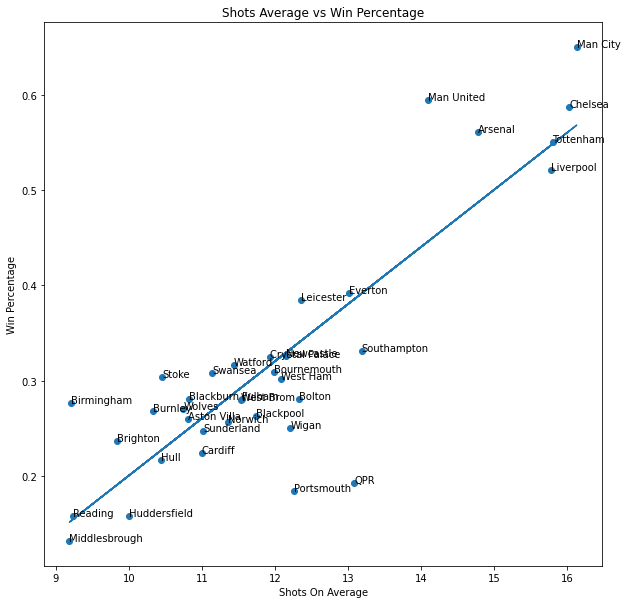

In [ ]:

def plot(x_val, teams):
  x_list = []
  win_ratio = []

  for team in teams_df:
    df = teams_df[team]
    x_total = 0.0
    wins = 0.0
    draws = 0.0
    losses = 0.0
    total = 0.0

    for index, row in df.iterrows():
      x_total += row[x_val]
      if row['Outcome'] == 'W':
        wins += 1
      elif row['Outcome'] == 'D':
        draws += 1
      else:
        losses += 1
      total += 1
    x_list.append(x_total / total)
    win_ratio.append(wins / total)

#Plotting the 3 different graphs
  fig, ax = plt.subplots(figsize =(10,10))
  ax.scatter(x=x_list, y=win_ratio)
  ax.set_title(x_val + " Average vs Win Percentage", fontsize=12)
  ax.set_xlabel(x_val + " On Average", fontsize=10)
  ax.set_ylabel("Win Percentage", fontsize=10)

  teams = list(teams)

  for i, label in enumerate(teams):
    ax.annotate(label, (x_list[i],win_ratio[i]))

  x = np.array(x_list)
  y = np.array(win_ratio)
  m, b = np.polyfit(x, y, 1)
  ax.plot(x, m * x + b)
  plt.show()

plot('Shots', teams)

In this graph we are looking at shots on average vs the team's winning percentage. We can see that a few teams truly stand out when it comes to the number of shots on average, these teams are, Man City, Man United, Arsenal, Chelsea, Tottenham, and Liverpool. Not including these standout teams, a hige bulk of the league has the same number of shots on average which lead to the them having very very similar win percentage. Overall we can see that there is a direct correlation between the shots on average and the teams winning percentage. The lower tier teams such as Reading, Huddersfield, and Middlesbrough, all have the 3 lowest shots on average and as a result have the lowest winning percentage. 
  The teams who double there shots on average, come close to having a winning percentage being almost twice as better. Having a high shots on average per game, is hugely important for a teams chances to win. 

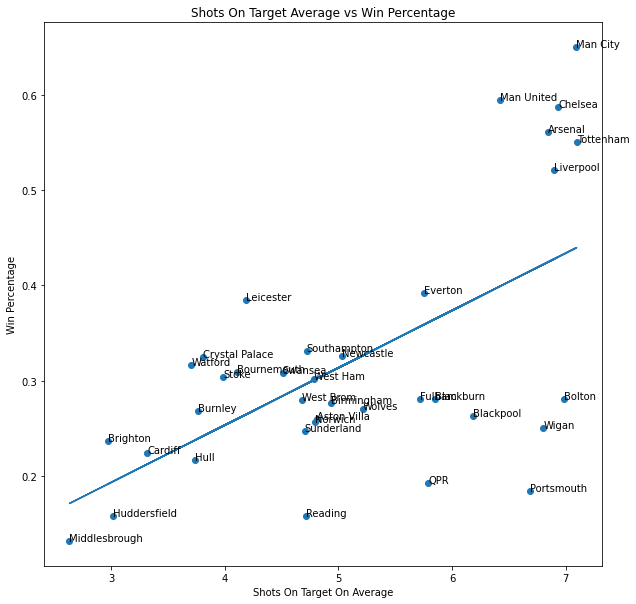

In [ ]:
plot('Shots On Target', teams)

In the above we now looked at winning percentage vs shots on target on average. In the previous graph we looked at winning percentage vs shots on average, and now a key difference is that we are looking at shots on target,and not just shots. Very similar to the previous graph on average shots, the top tier of teams all average the most shots on average, the teams are Man City, Man United, Chelsea, Arsenal, Tottenham, and Liverpool. 
The lower tier of teams of Middlesbrough, Huddersfield, Hull, Cardiff, and Brighton, all average the least number of Shots on target. 
  The middle tier of teams are all clustered together in their average of shots on target per game. There are many similaraties between this graph and the previous. For example, Man City averages both the highest shots on target, and averages the most total shots, and in both graphs we can see they lead with the highest winning percentage. 



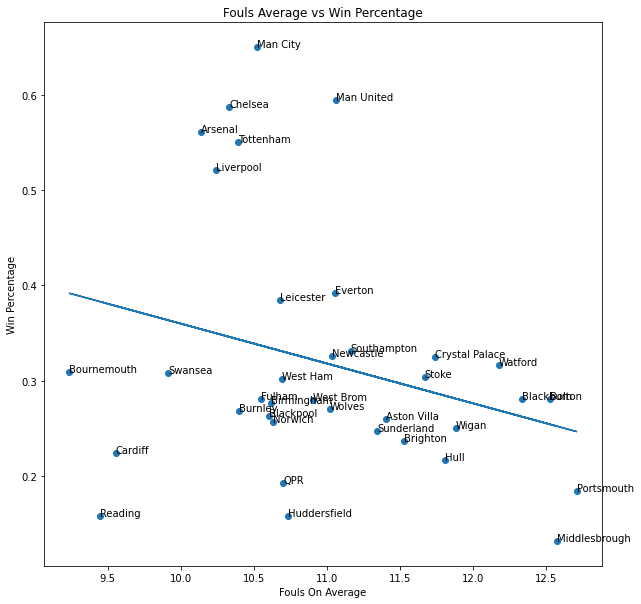

In [ ]:
plot('Fouls', teams)

Next we looked at the average number of fouls vs the team's winning percantge. Unlike the previous graph, there isn't a direct linear trend occuring here. A few of the teams which have the the least number of fouls commmited, actually have the worst winning percentage here, which includes Bornemouth, Swansea, and Cardiff. Very interestingly the top tier teams with the highest winning percanage, all commited around the same number of fouls per game, which includes Man City, Man United, Chelsea, Arsenal, Tottenham, Liverpool. 
  While there isn't a linear correlation between Average fouls vs the winning percentage, there still is a direct pattern between a team's success. As mentioned the team's with the highest winnning percentage committed the average number of the fouls in a similar range, from 10 to nearly 11.3 per game. 
  

While the graphs above gave a great indicator between the correleation of our stats and a team's winning success, it would be very helpful to have another tyoe of visualization to show us where most of the data is clustered. Violin plots are able to indicate to us where most of our data is clustered, showing whether its clustered around the minimum, maxiumum or the average.
In the next section we plotted multiple violin plots for each team, with each violot plot having one of our key stats on the y axis being compared to the outcome of the game on the x axis. We have three different outcomes which we loooked at the distribution for, and those are a W which represents a win, an L which represents a loss, and a D which represents a draw. 

**Eeach team's violin plot**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

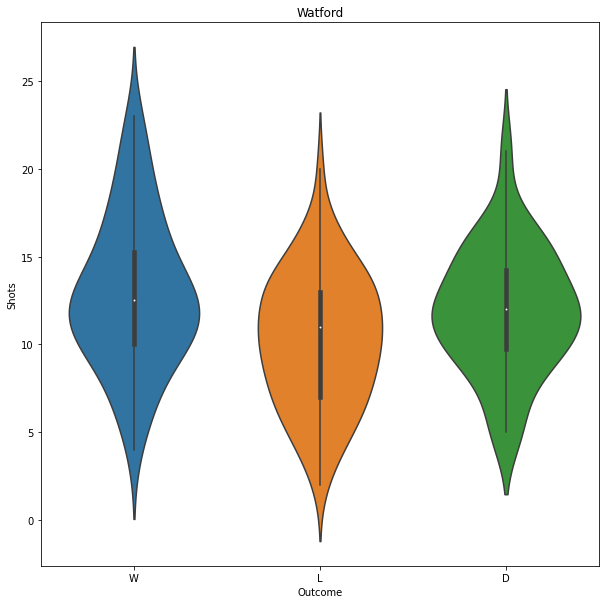

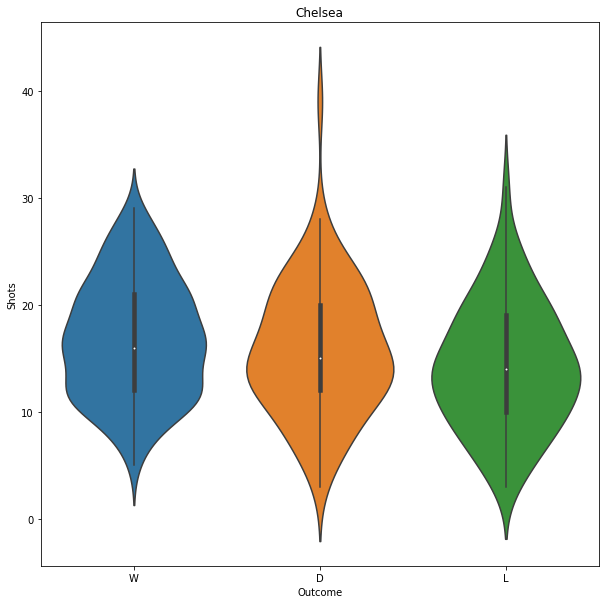

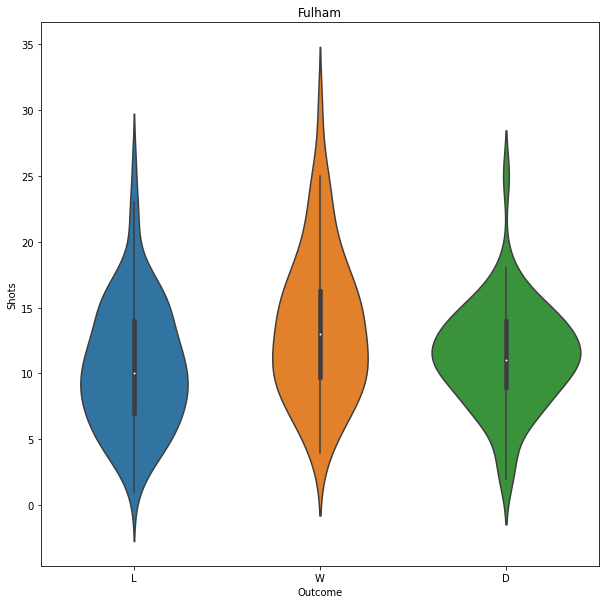

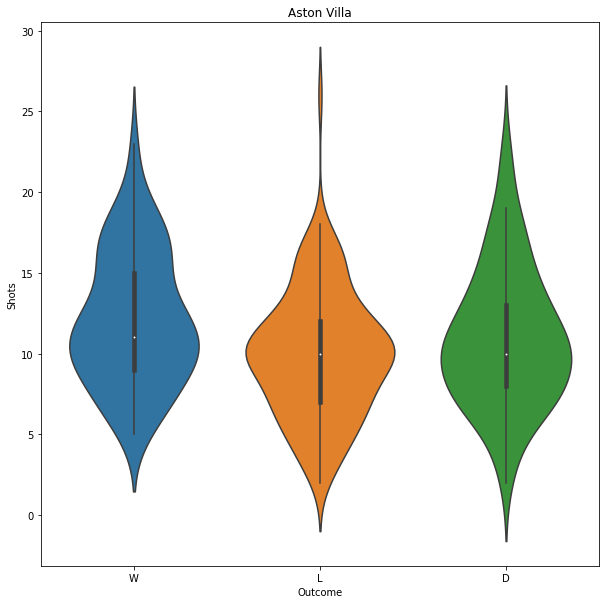

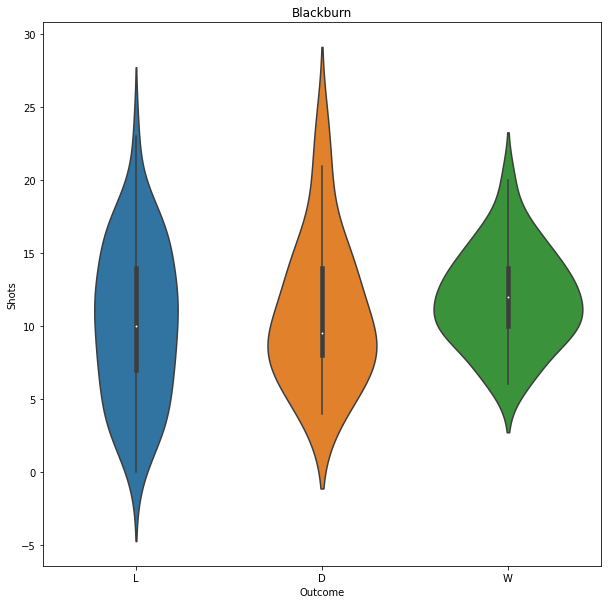

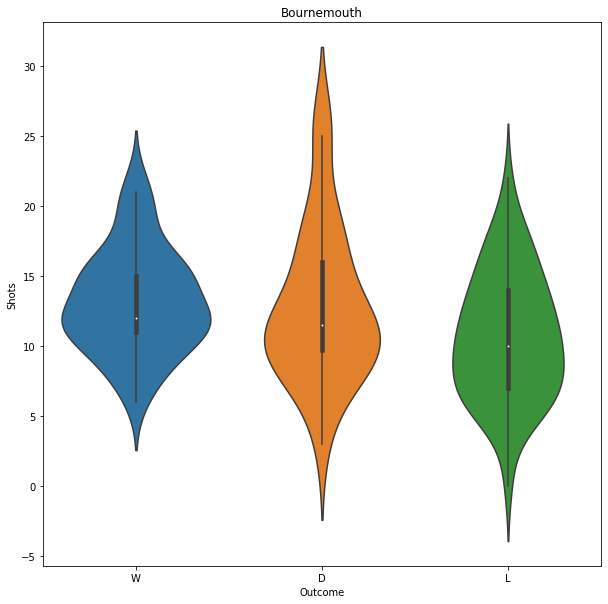

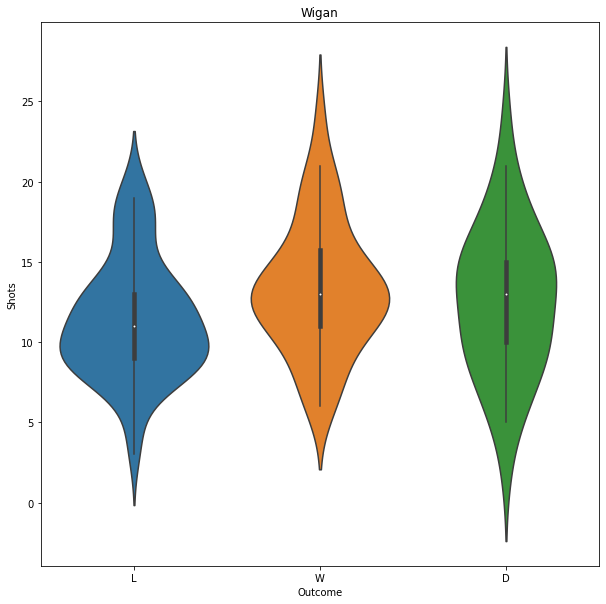

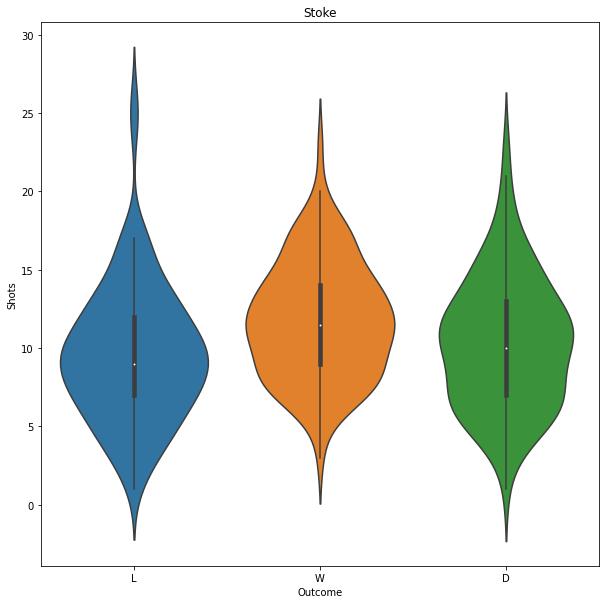

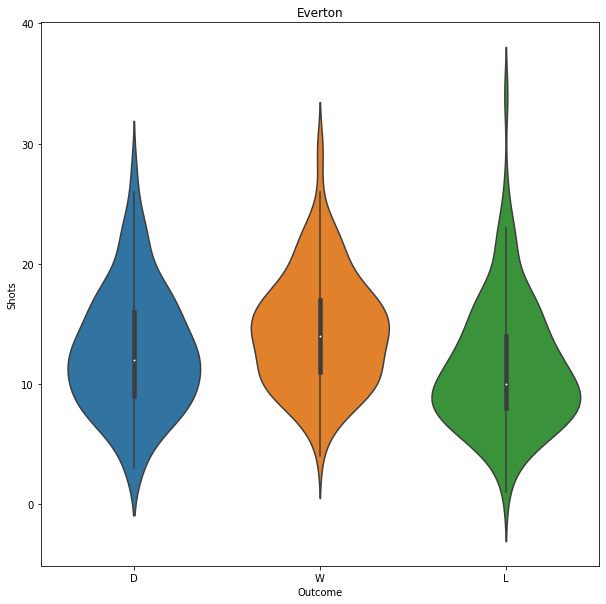

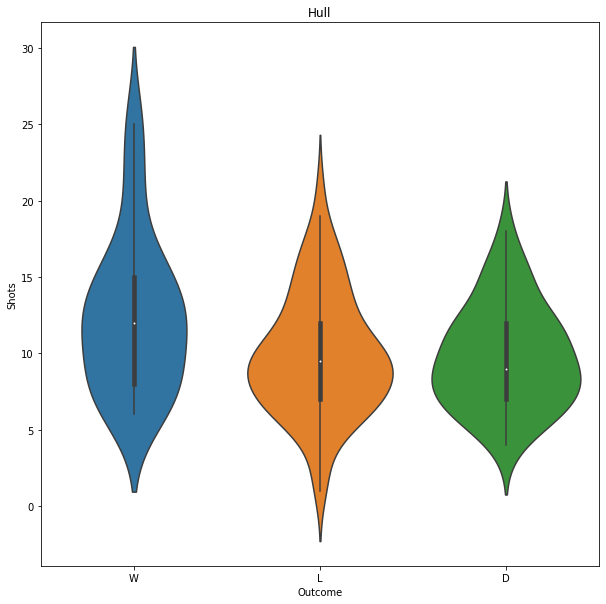

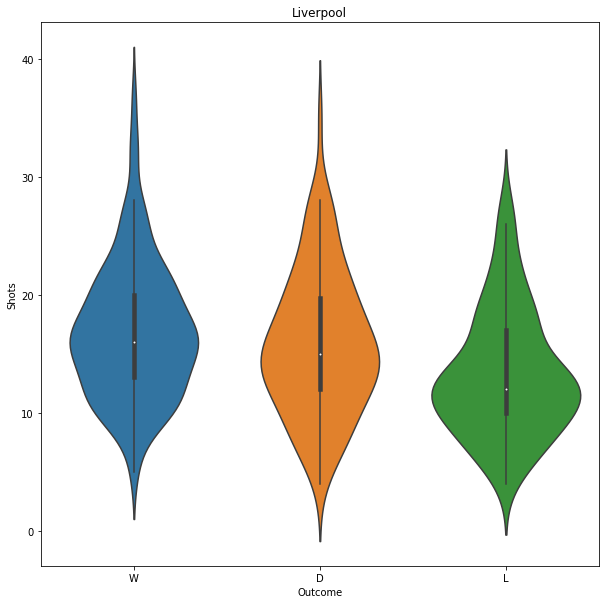

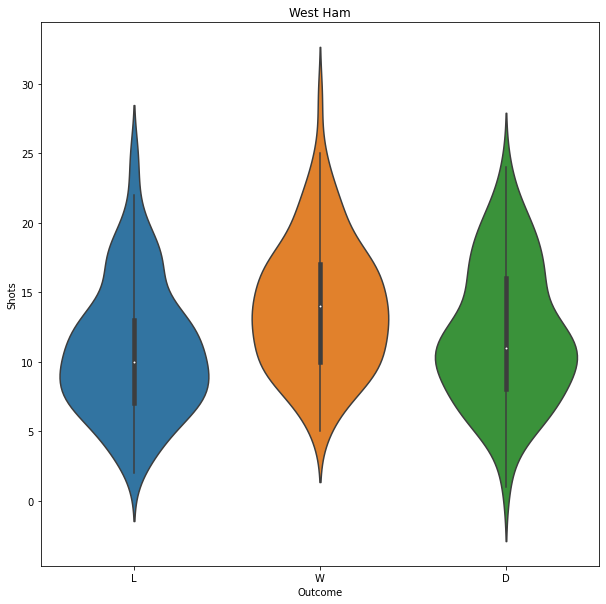

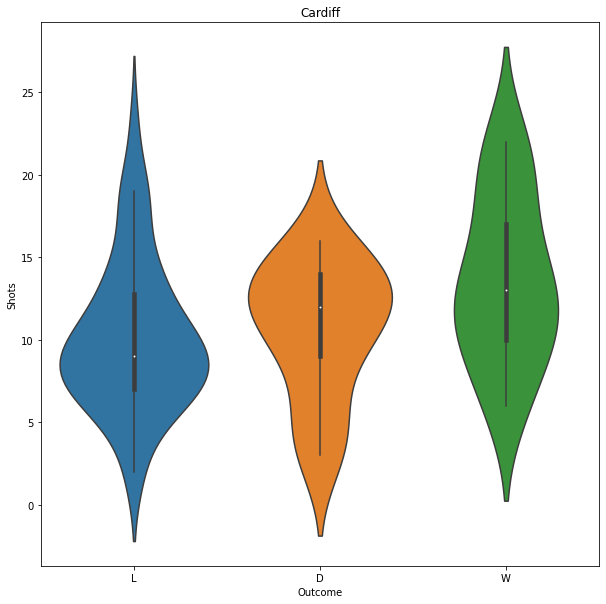

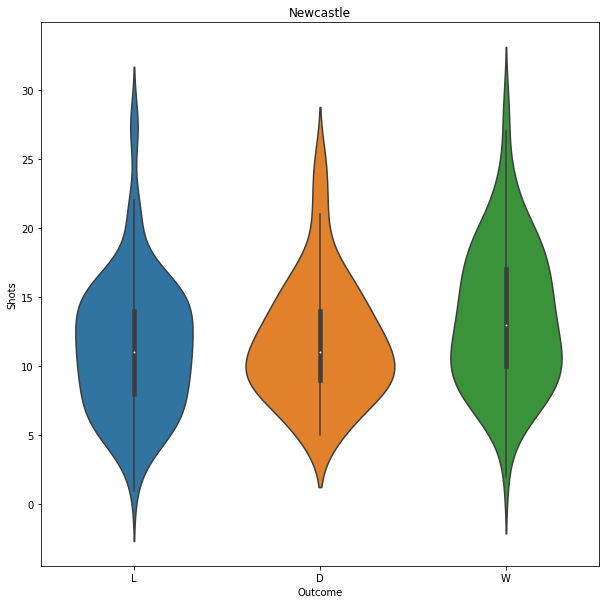

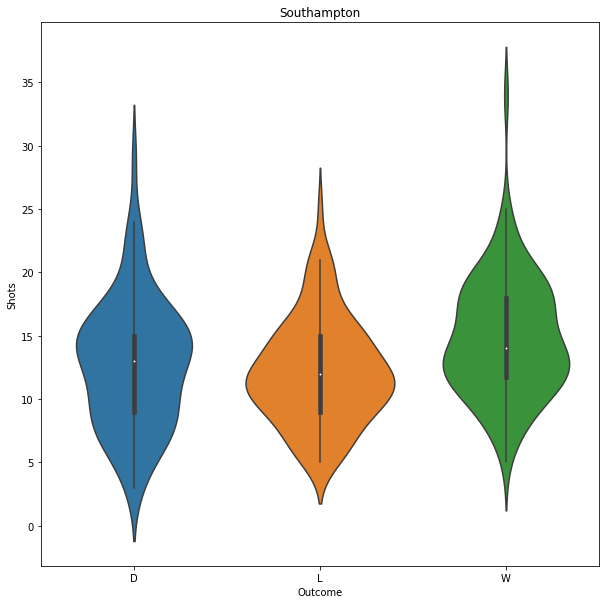

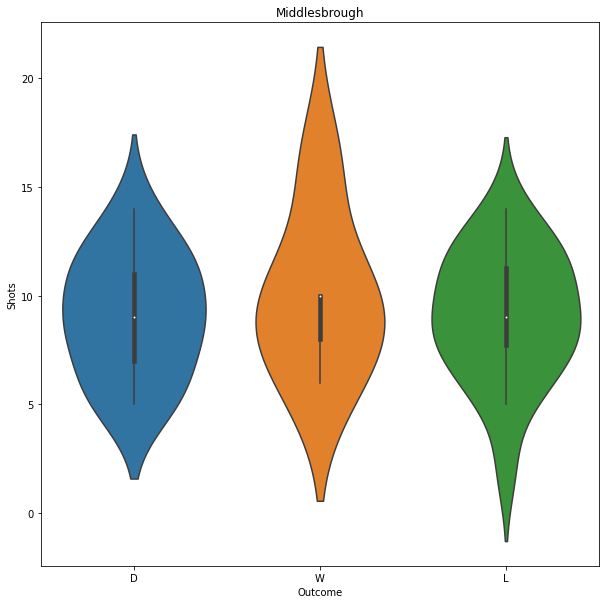

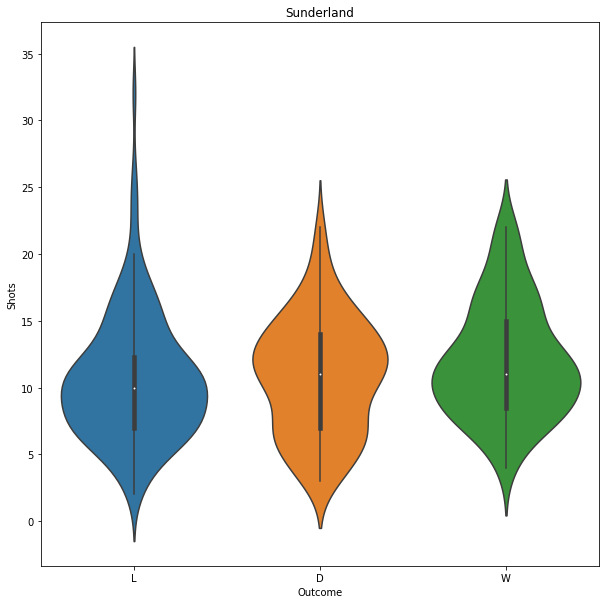

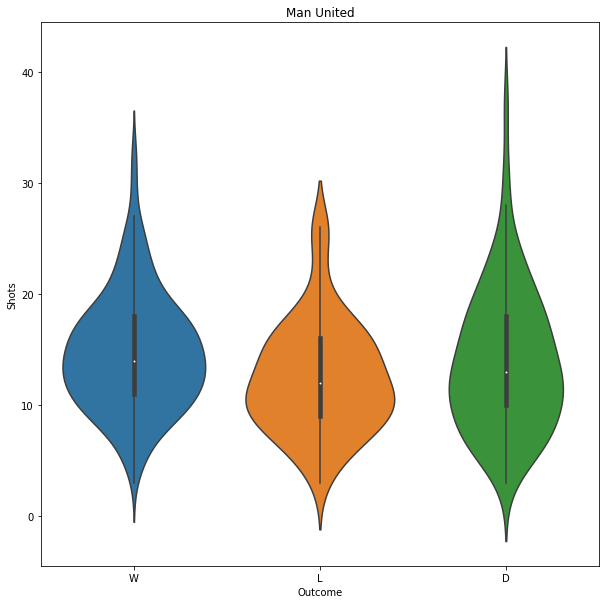

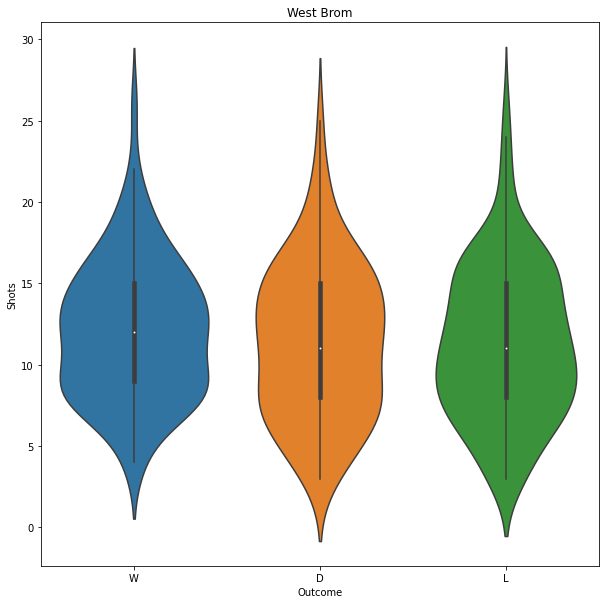

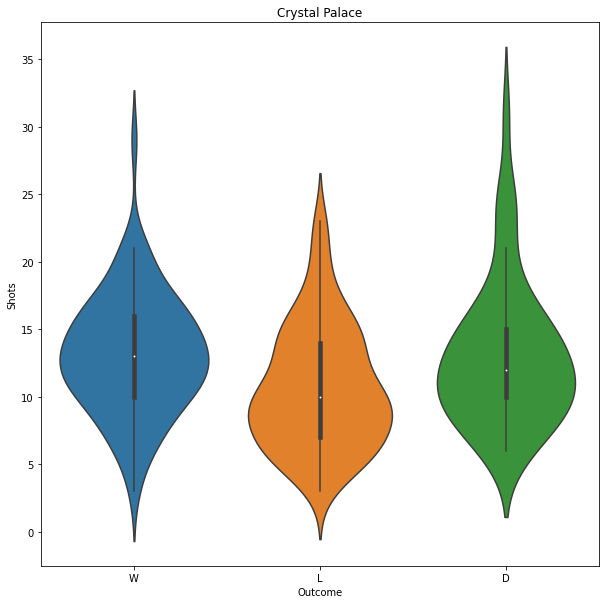

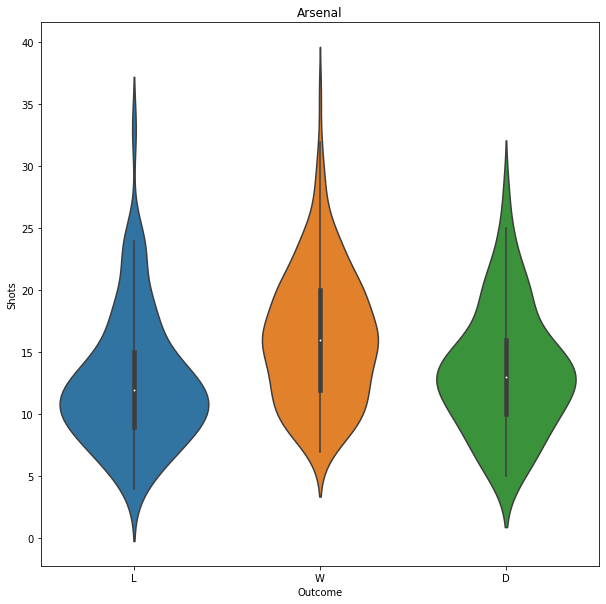

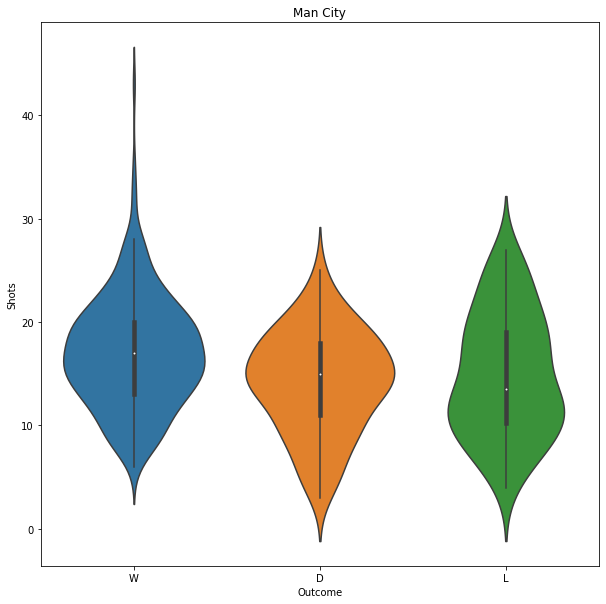

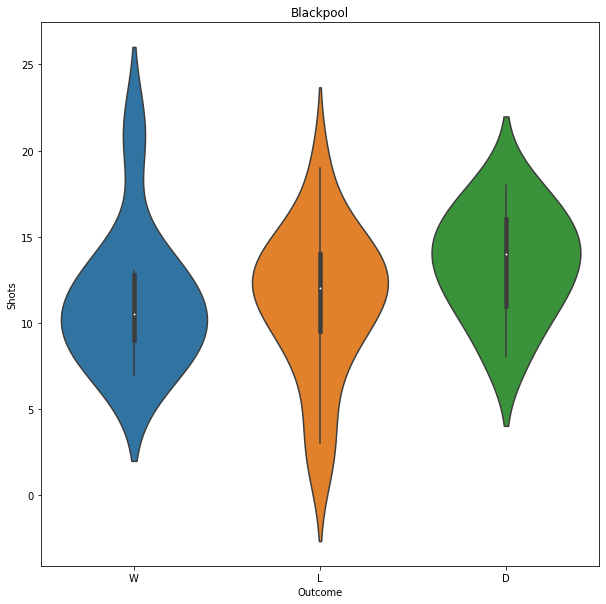

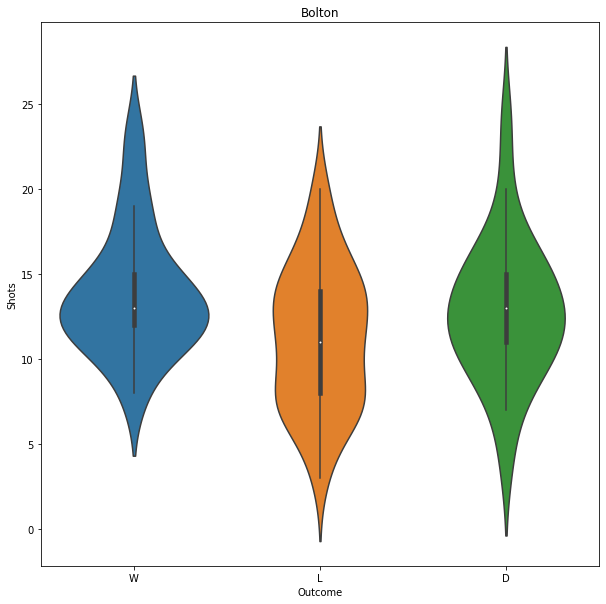

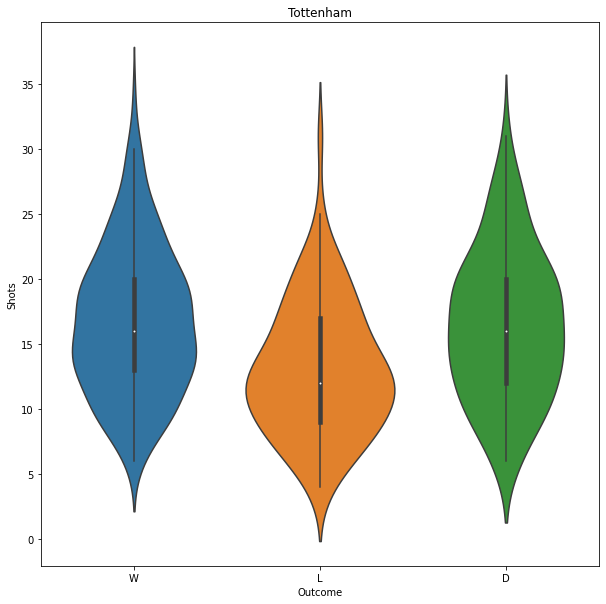

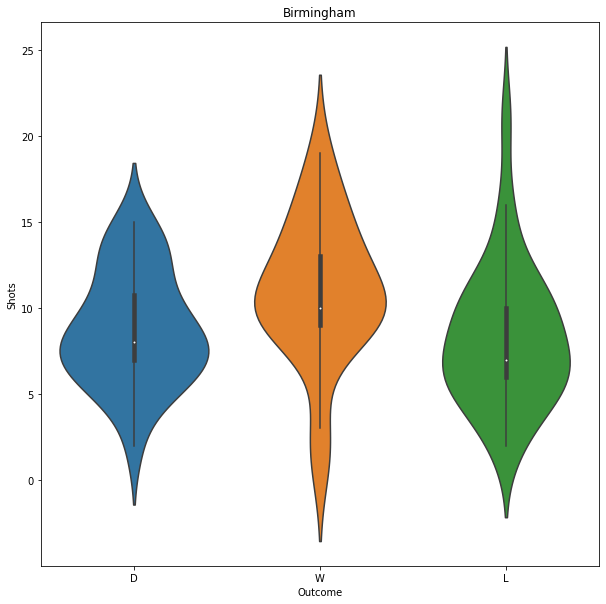

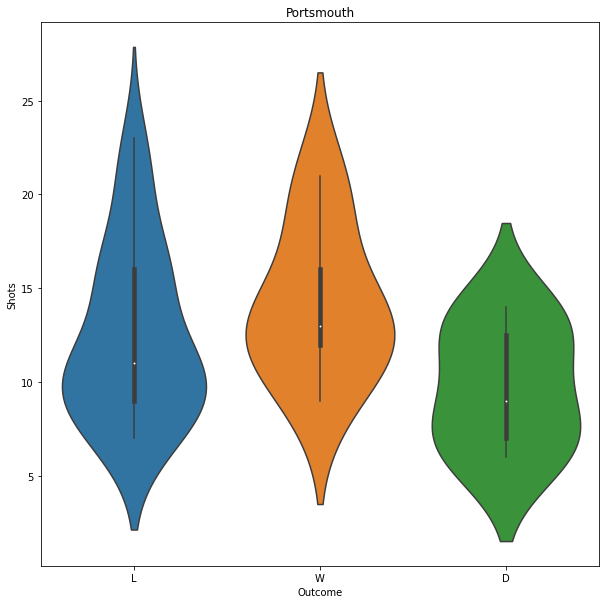

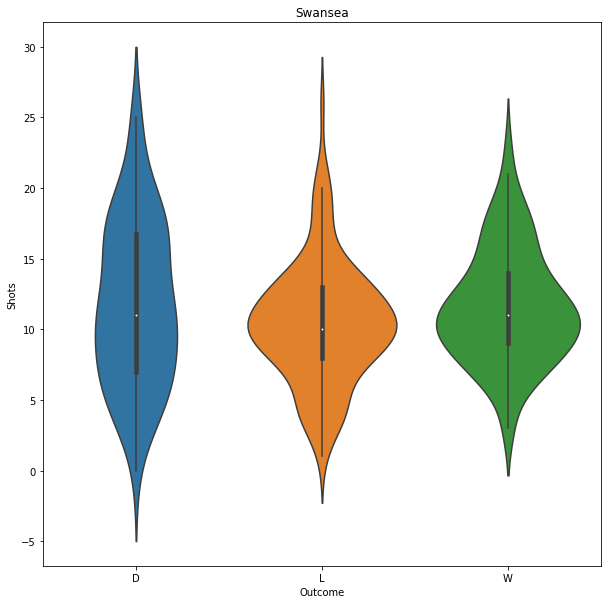

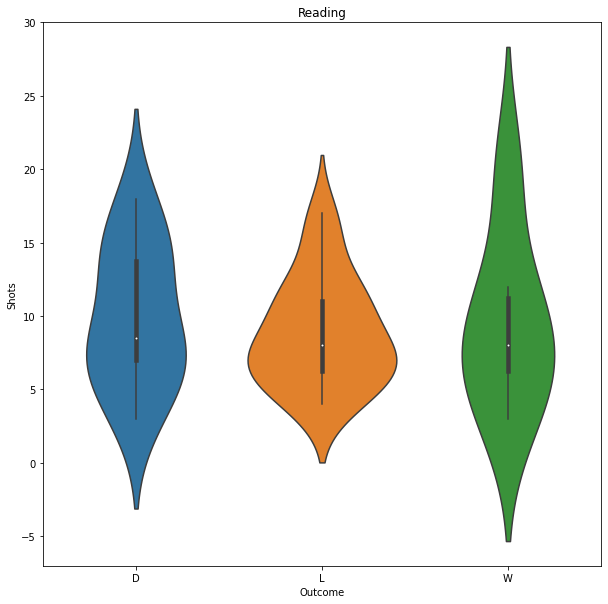

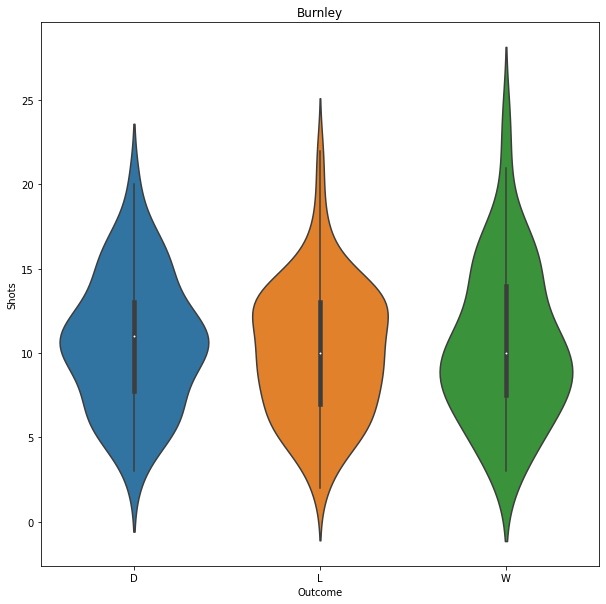

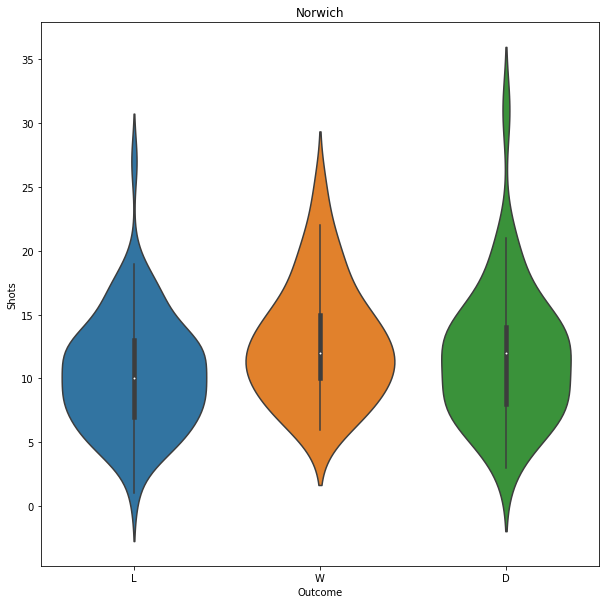

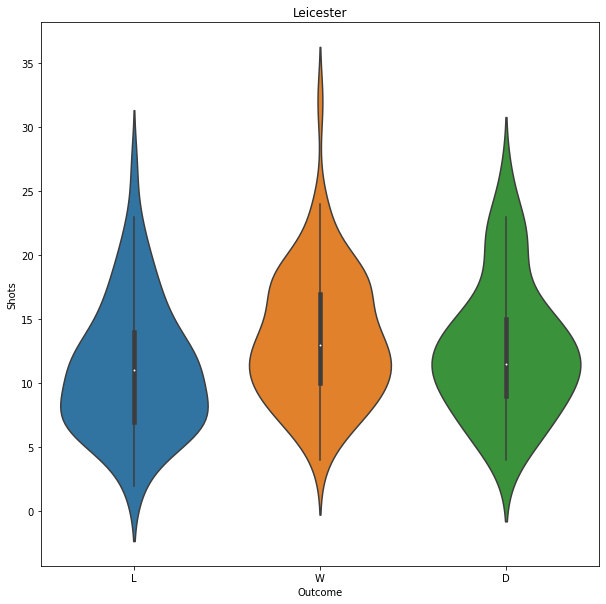

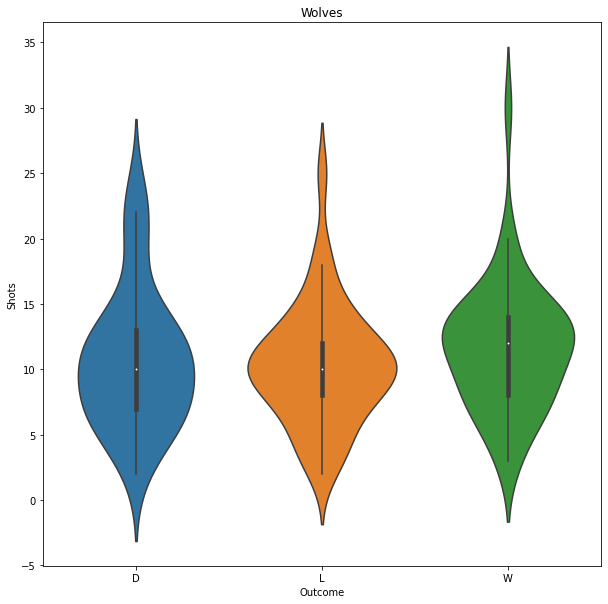

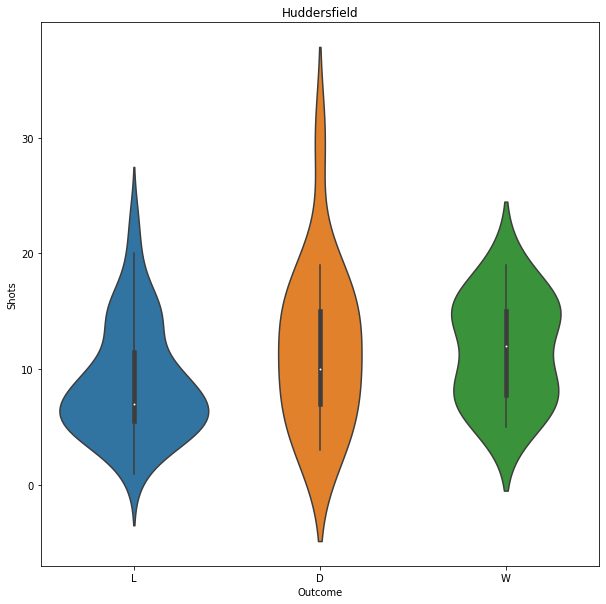

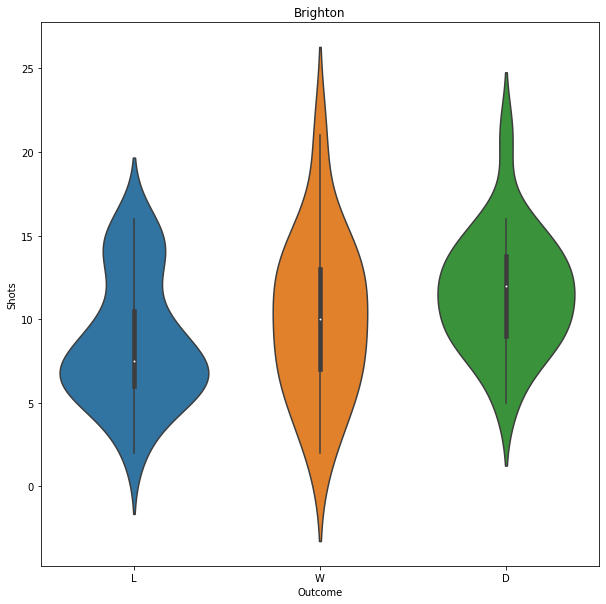

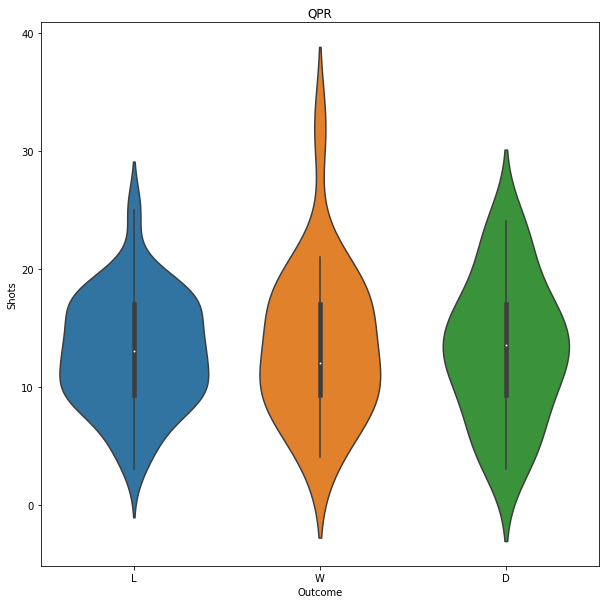

In [ ]:
  for team in teams_df:
    fig, ax = plt.subplots(figsize=(10,10))
    df = teams_df[team]
    ax = sns.violinplot(x = 'Outcome',y = 'Shots', data=df)
    ax.set_title(team)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

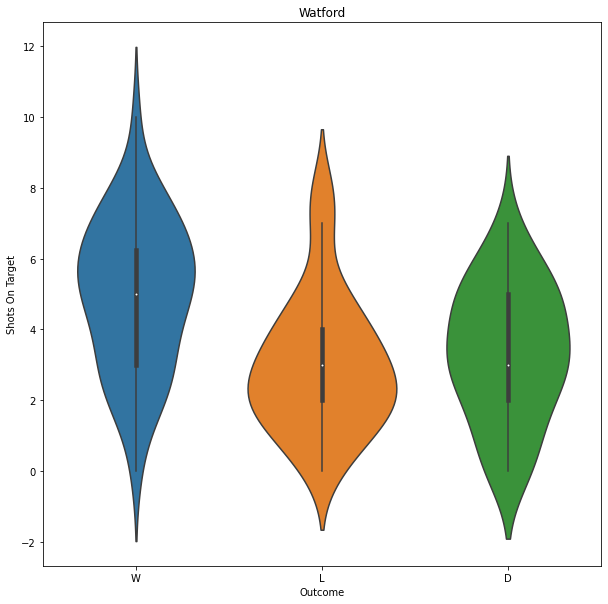

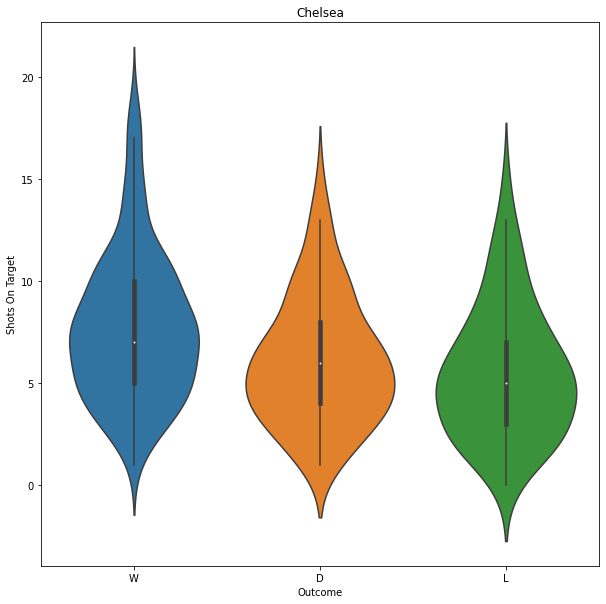

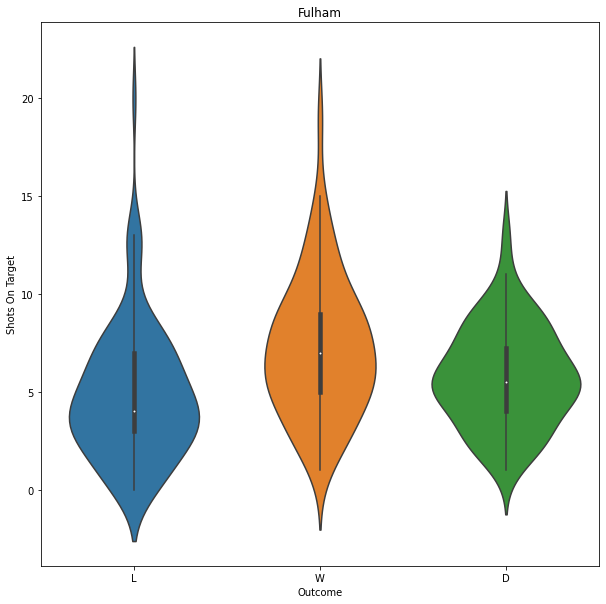

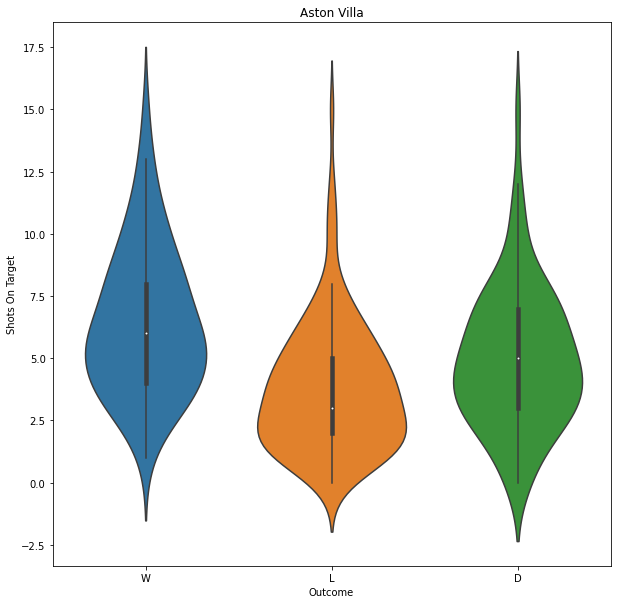

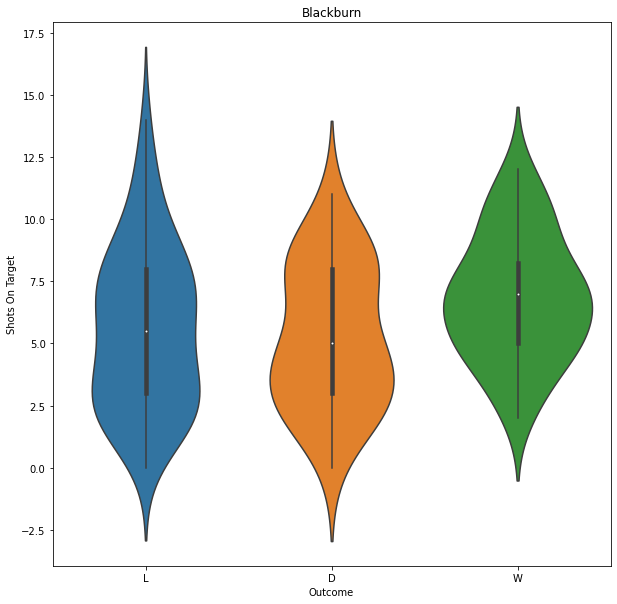

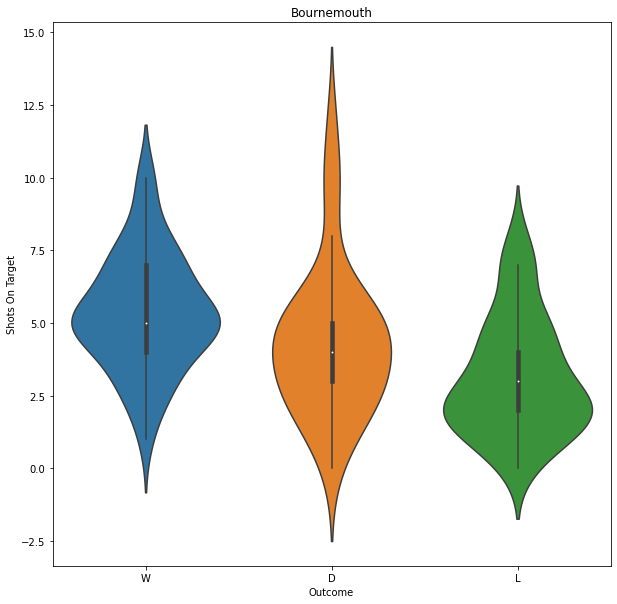

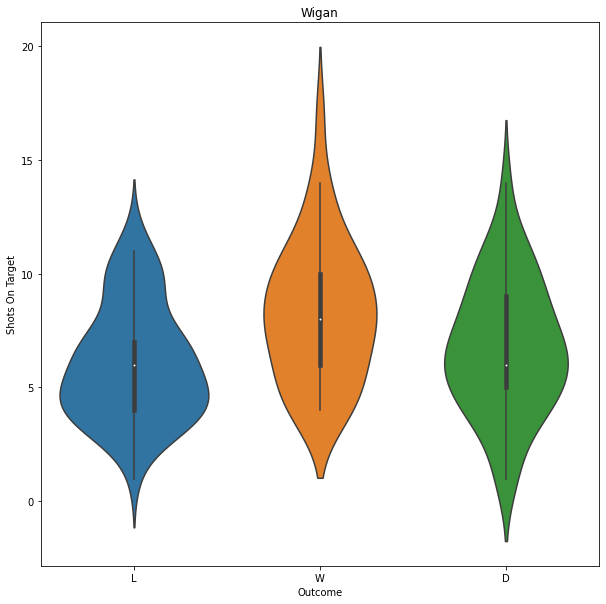

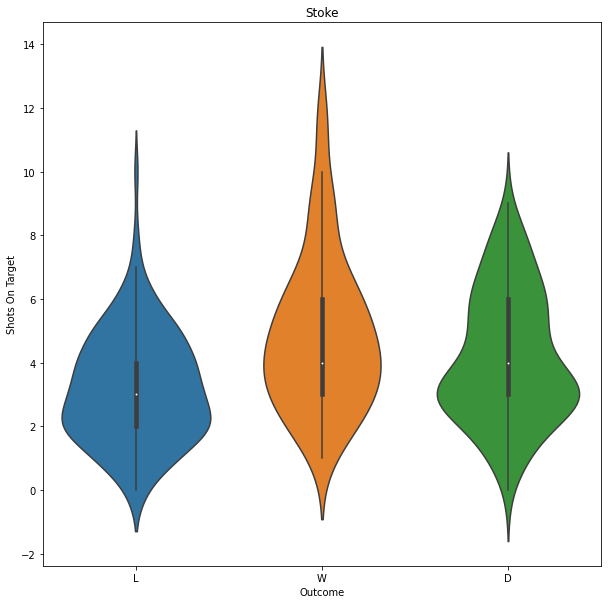

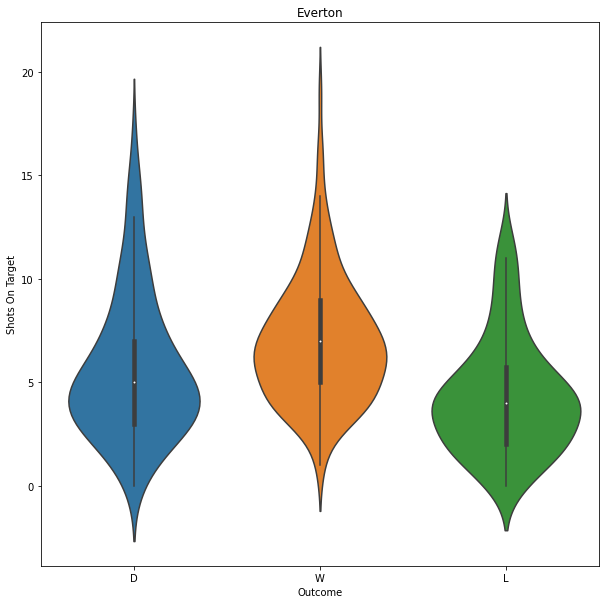

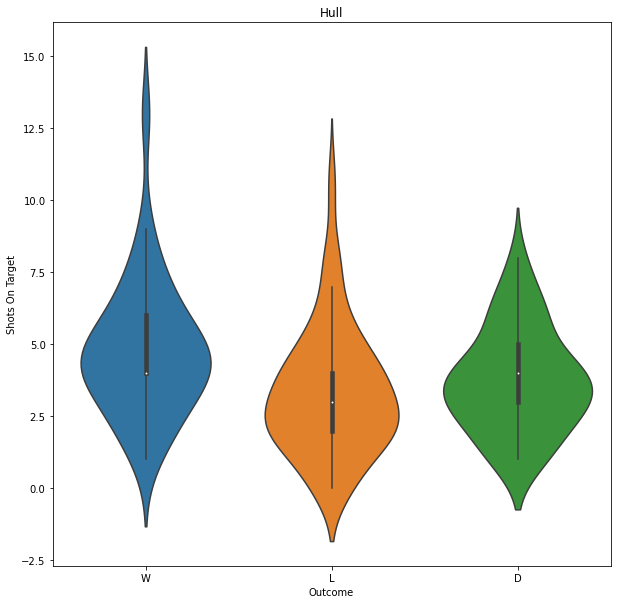

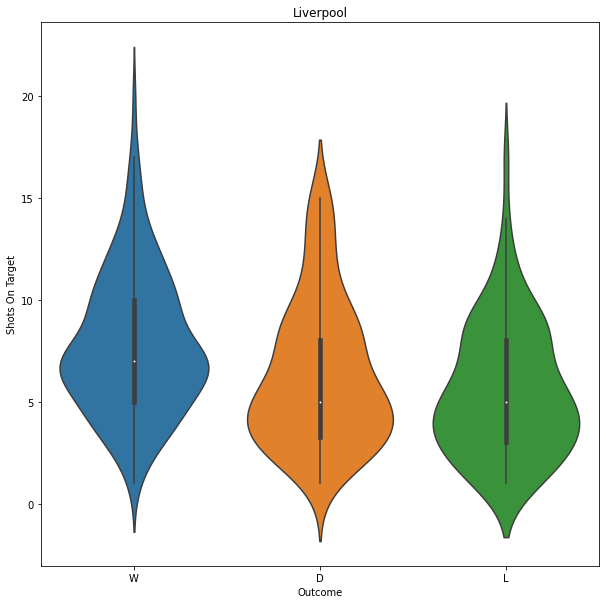

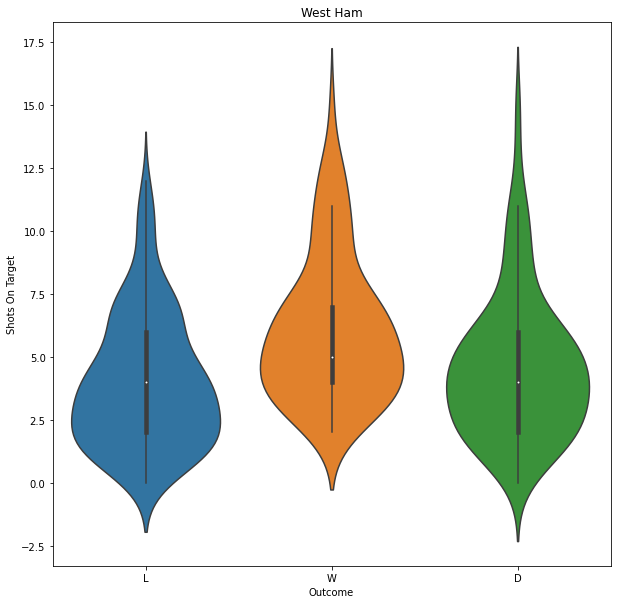

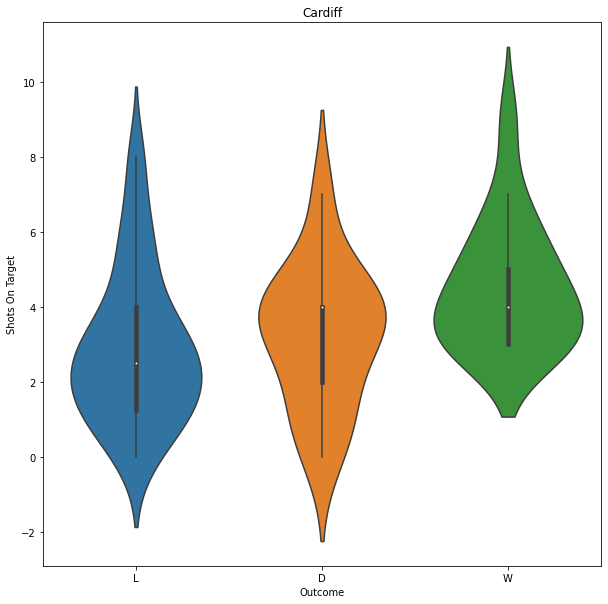

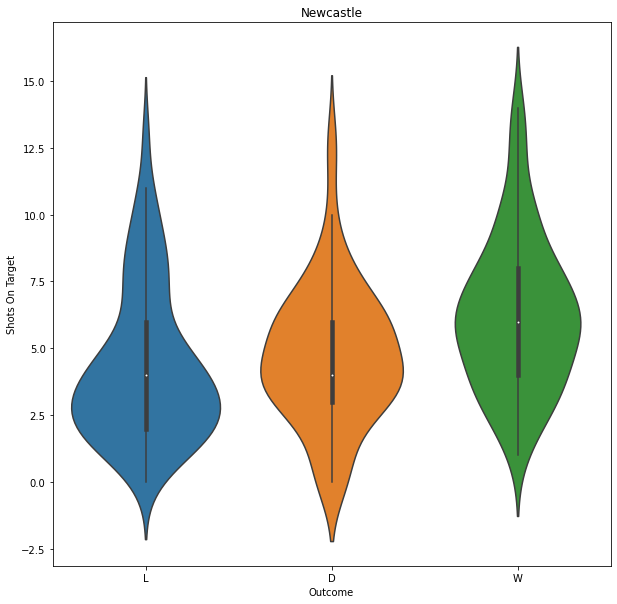

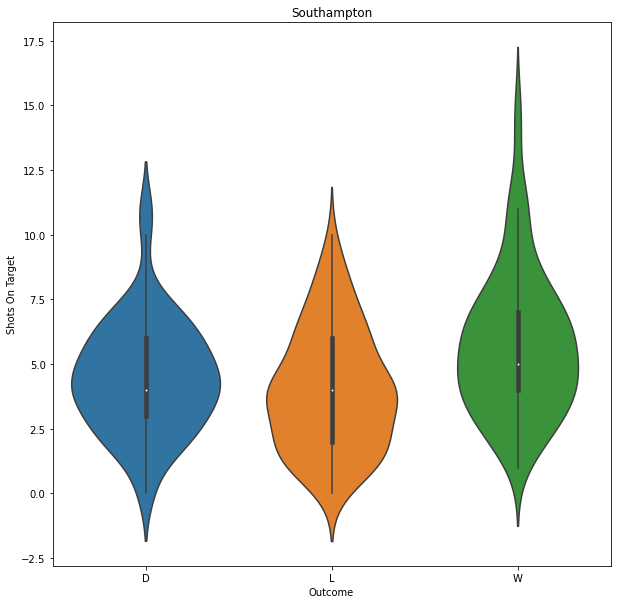

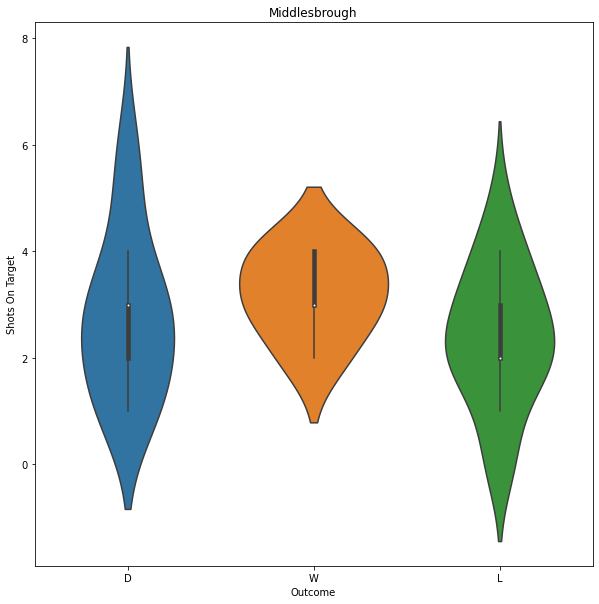

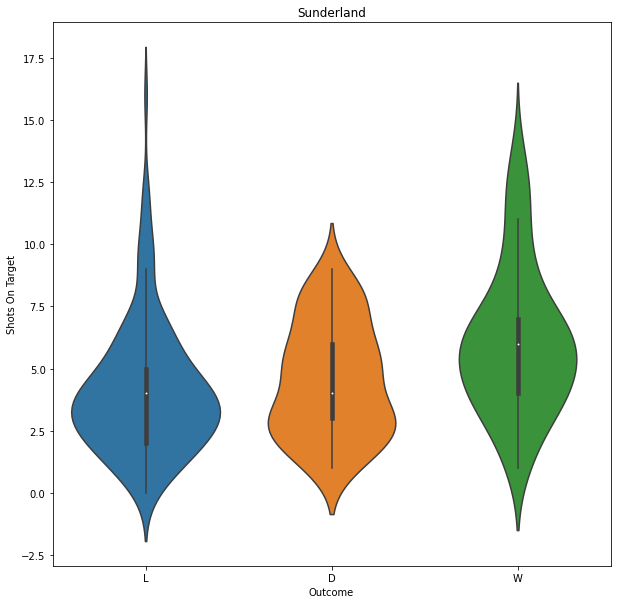

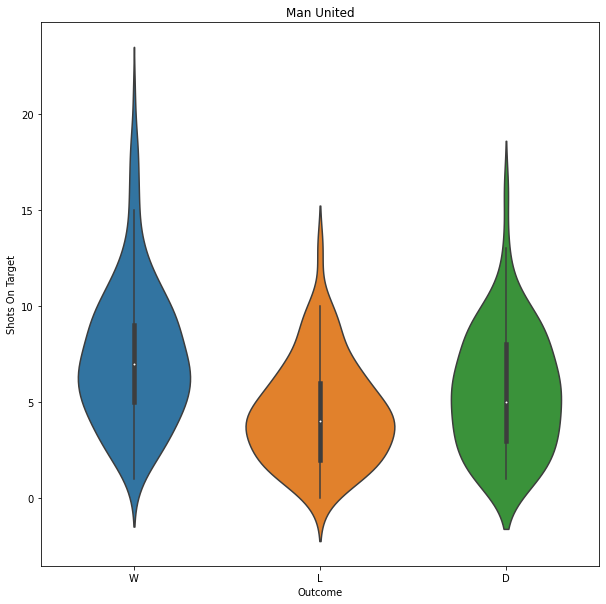

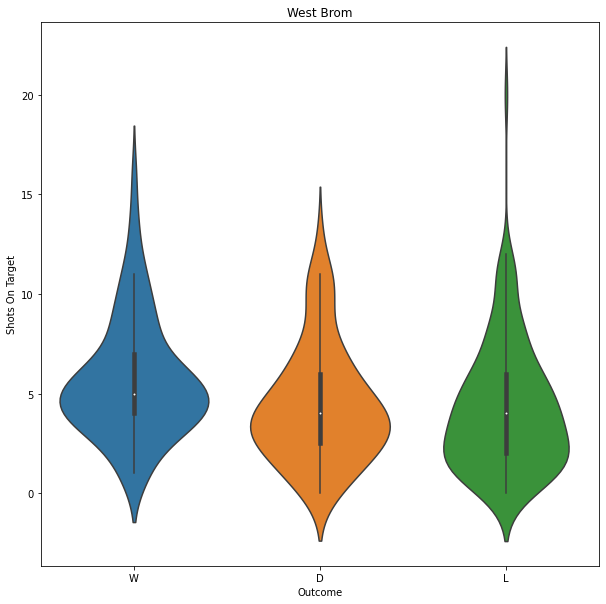

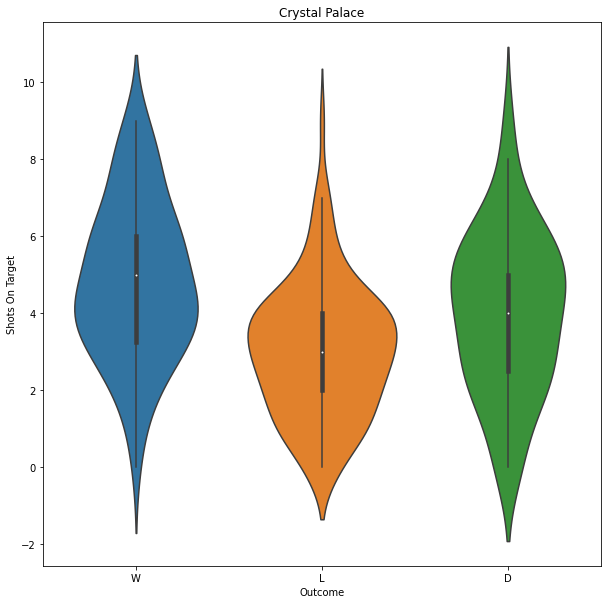

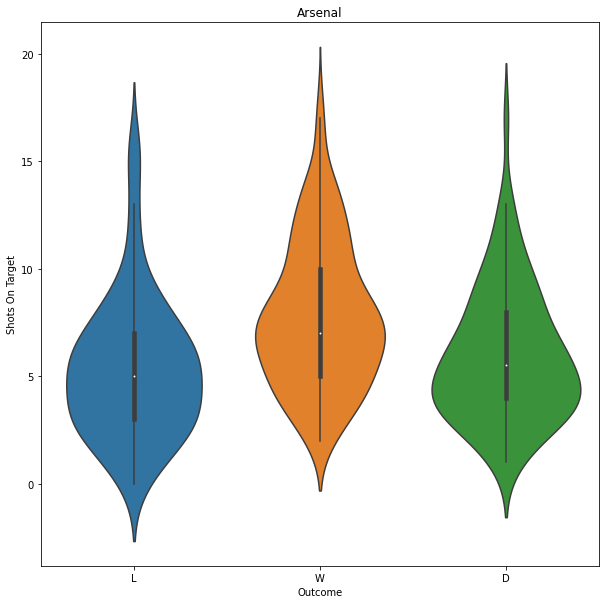

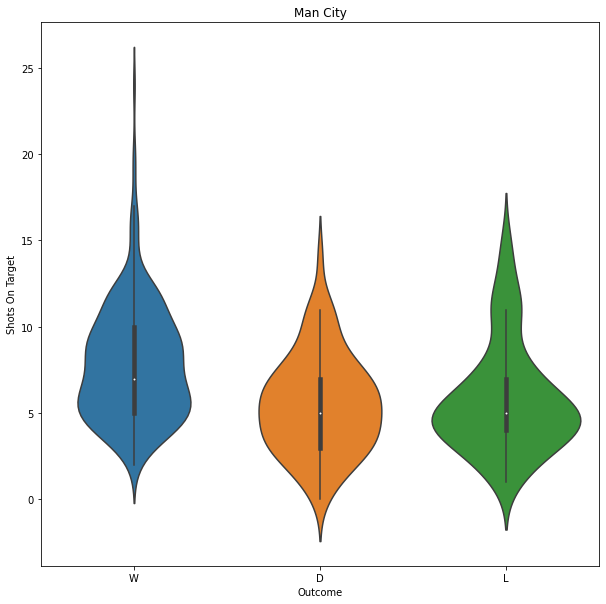

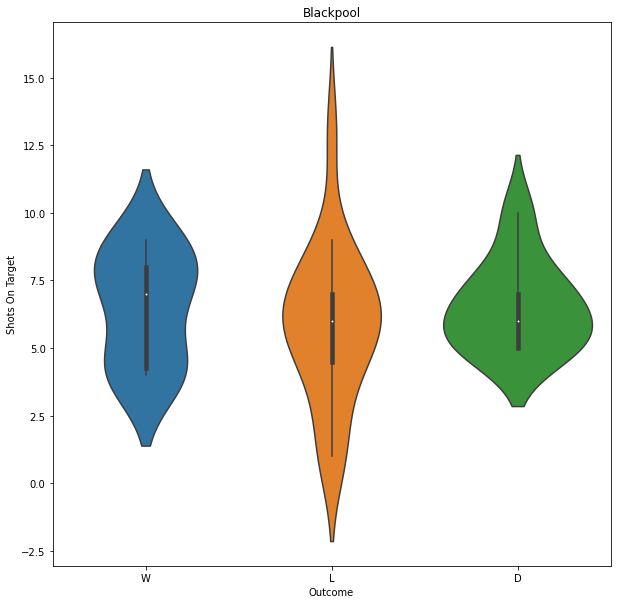

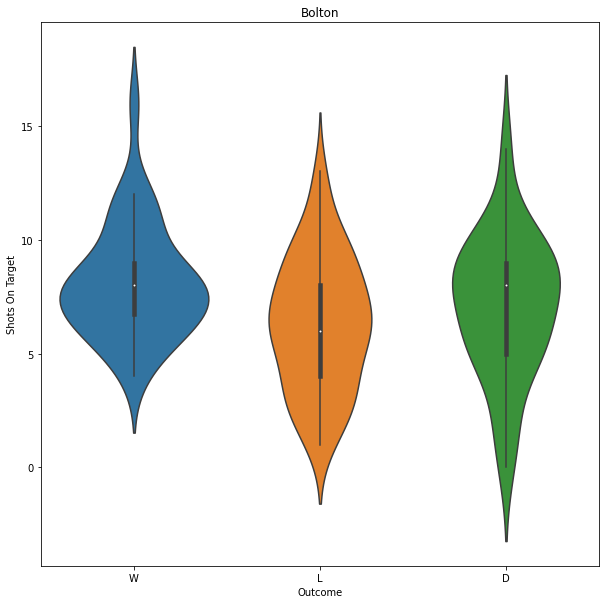

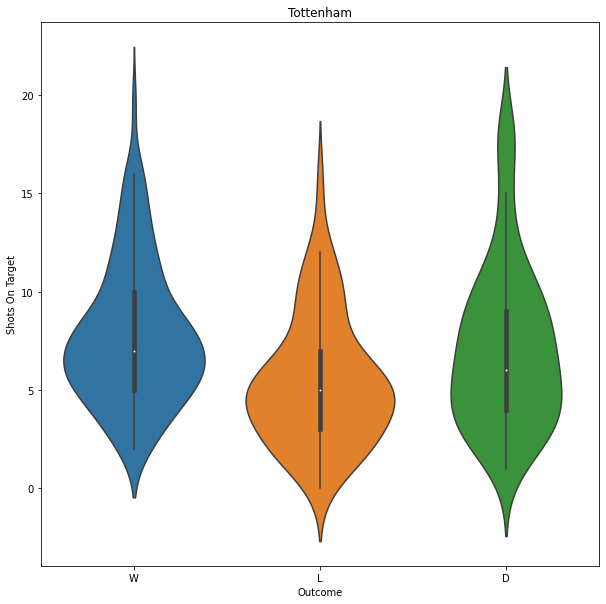

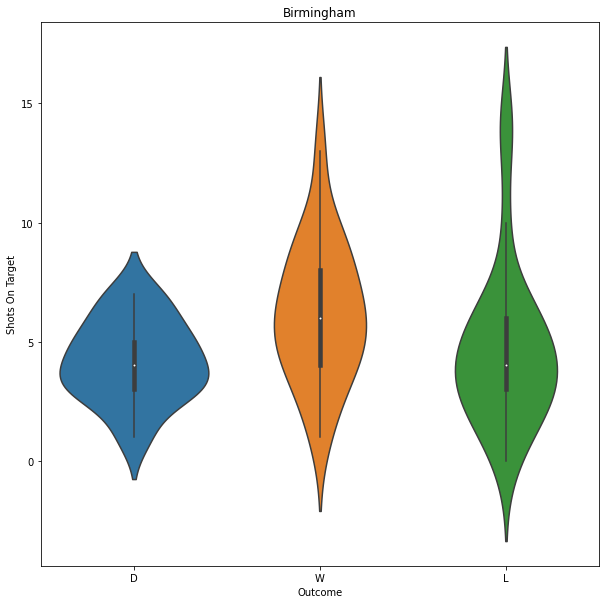

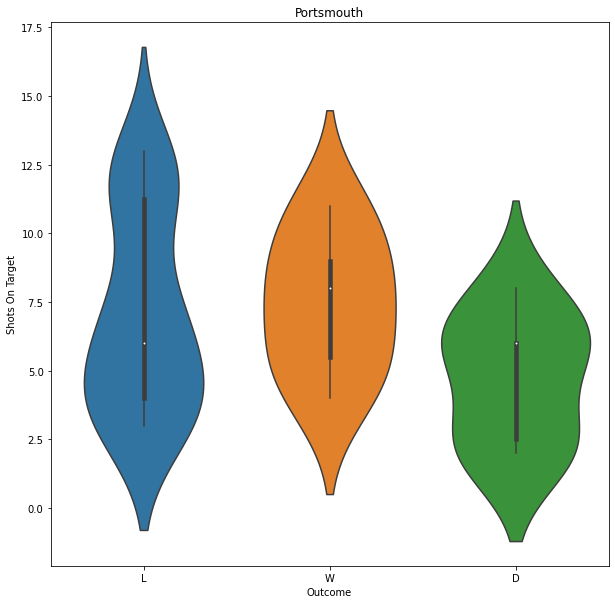

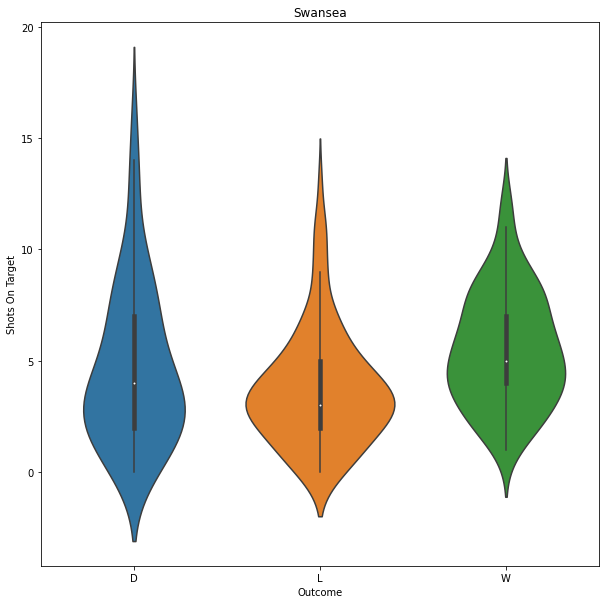

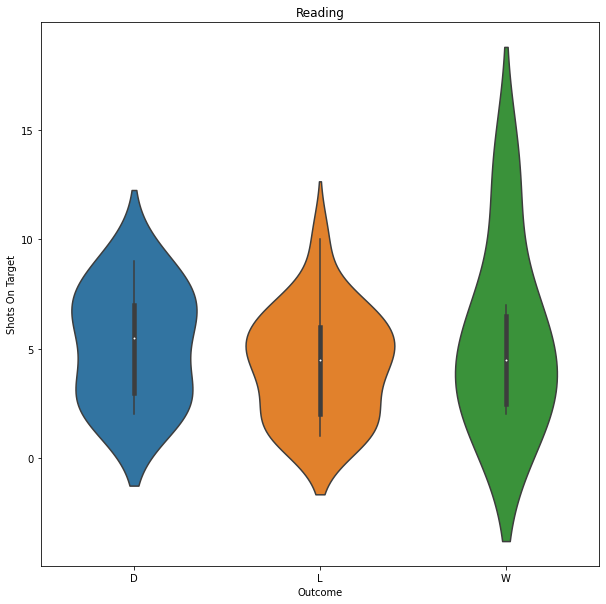

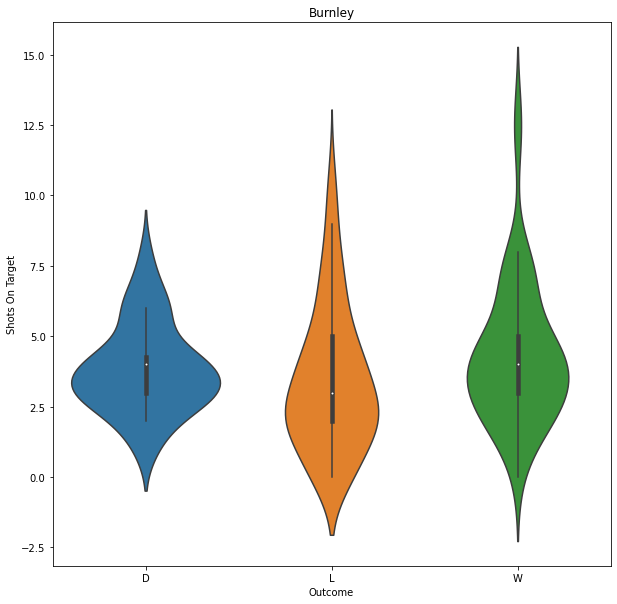

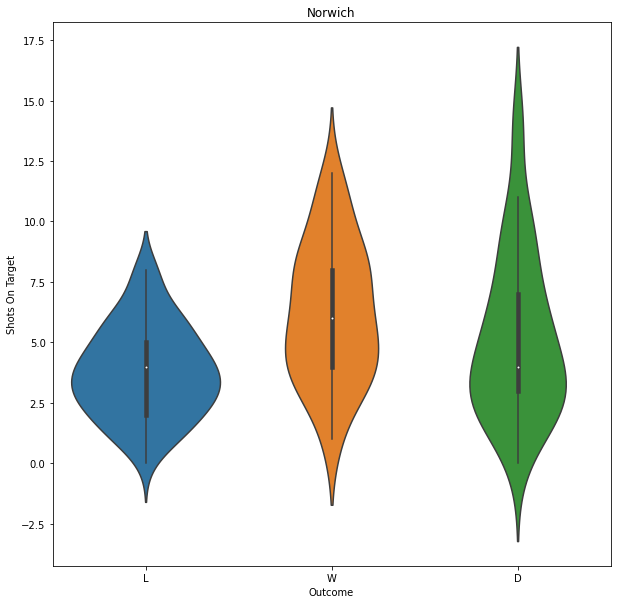

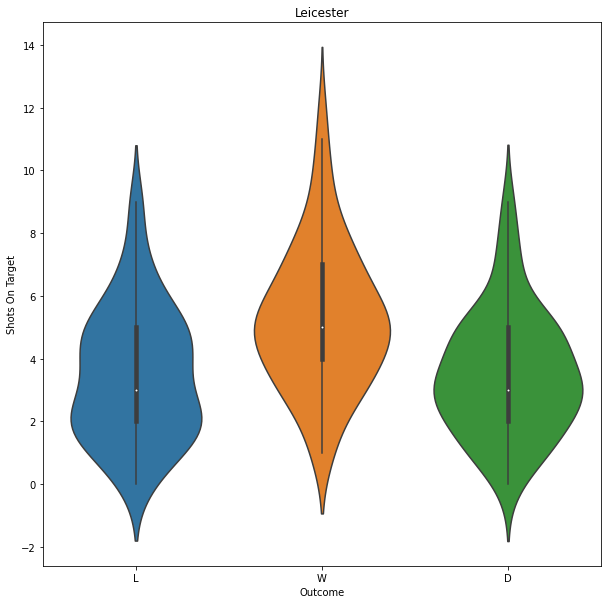

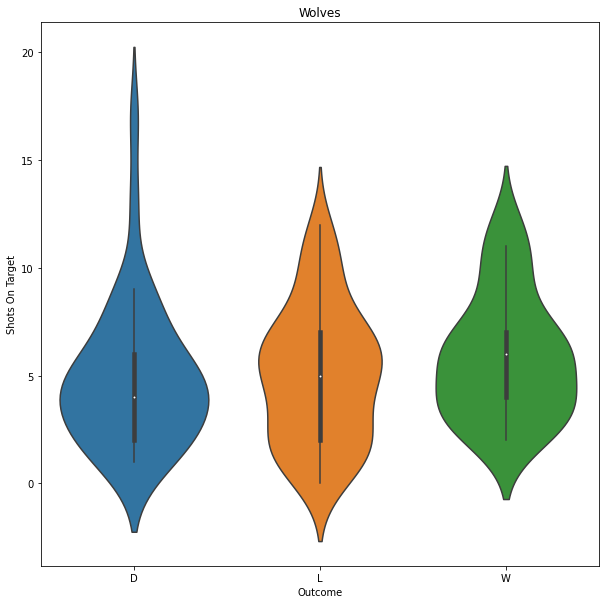

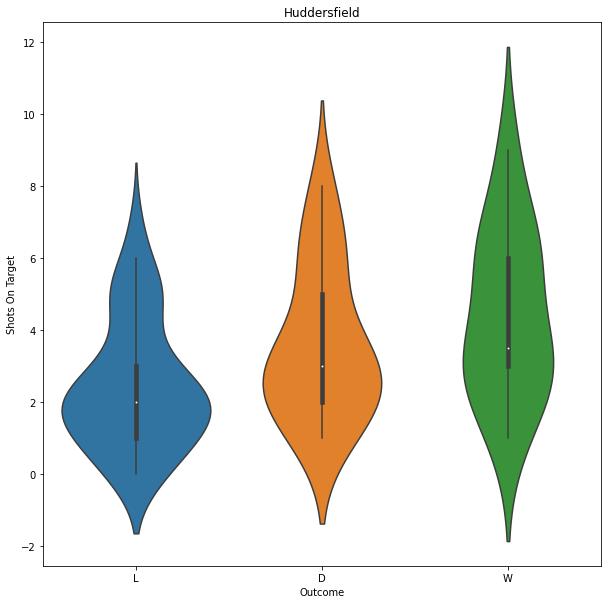

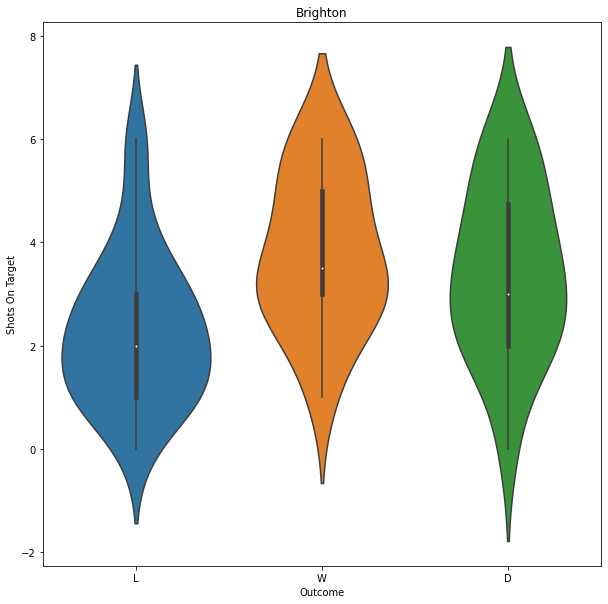

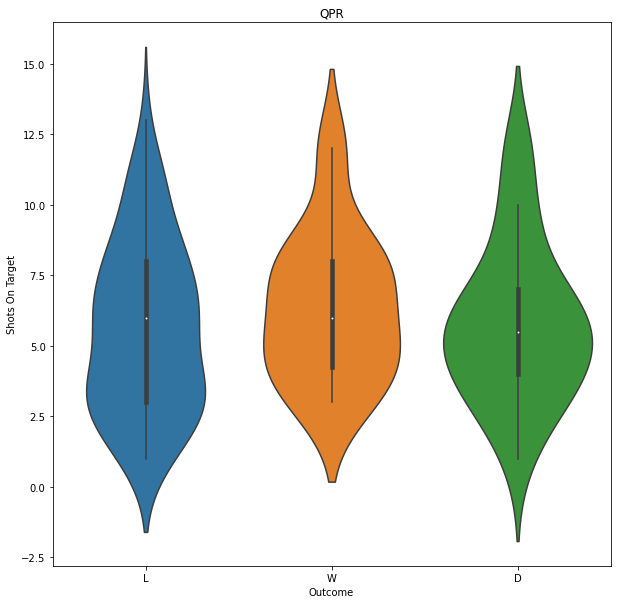

In [ ]:
for team in teams_df:  
    fig, ax = plt.subplots(figsize=(10,10))
    df = teams_df[team]
    ax = sns.violinplot(x = 'Outcome',y = 'Shots On Target', data=df)
    ax.set_title(team)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

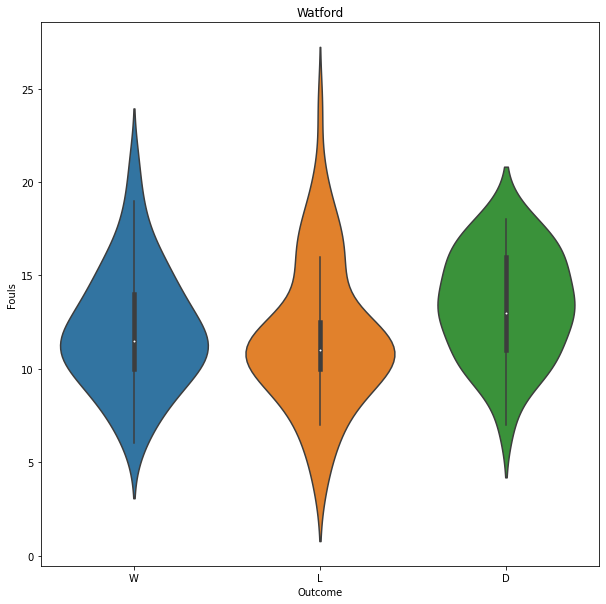

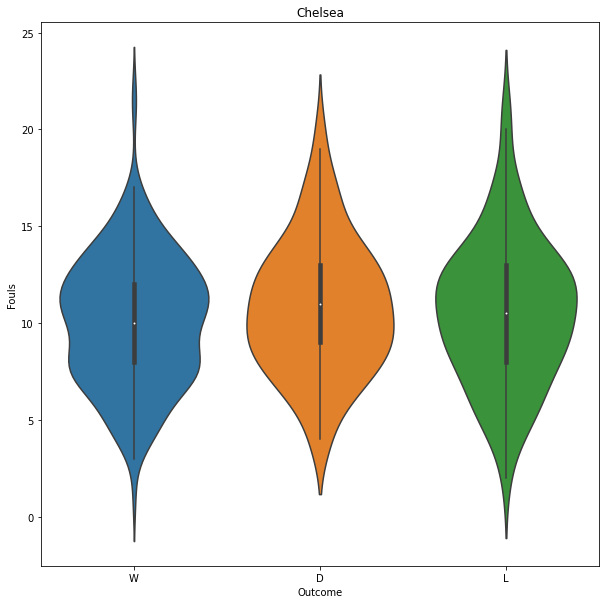

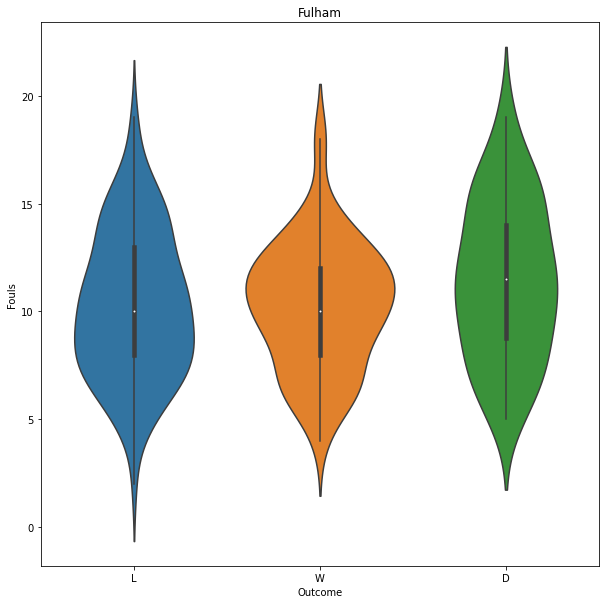

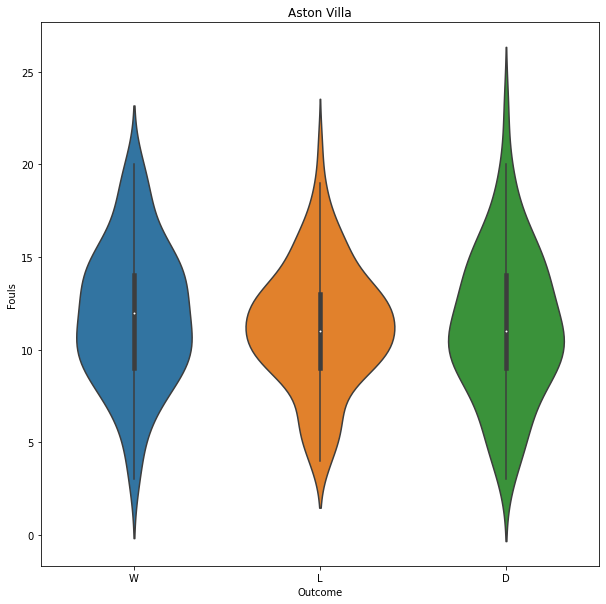

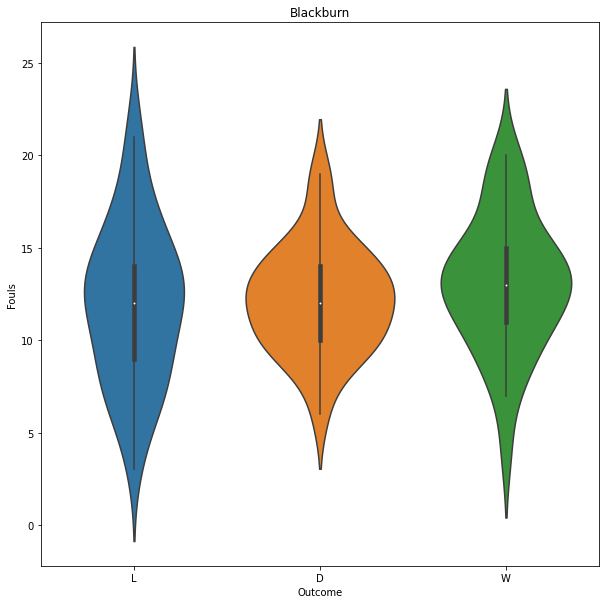

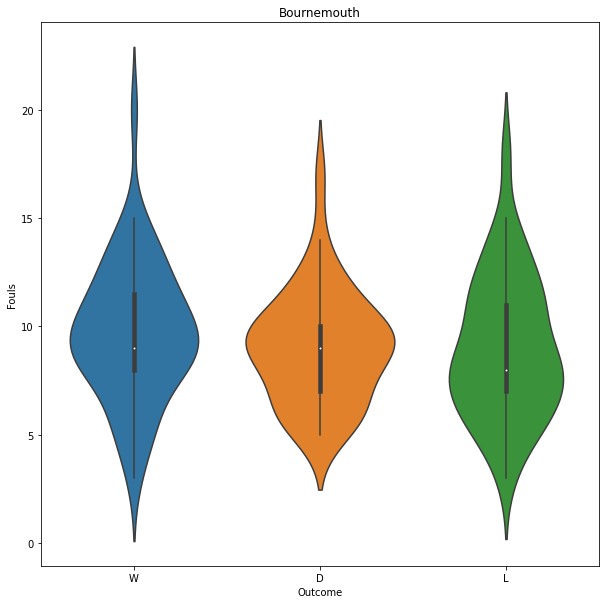

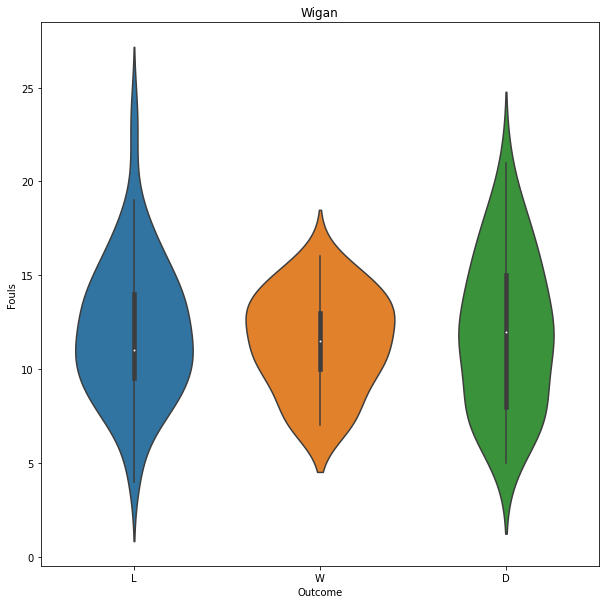

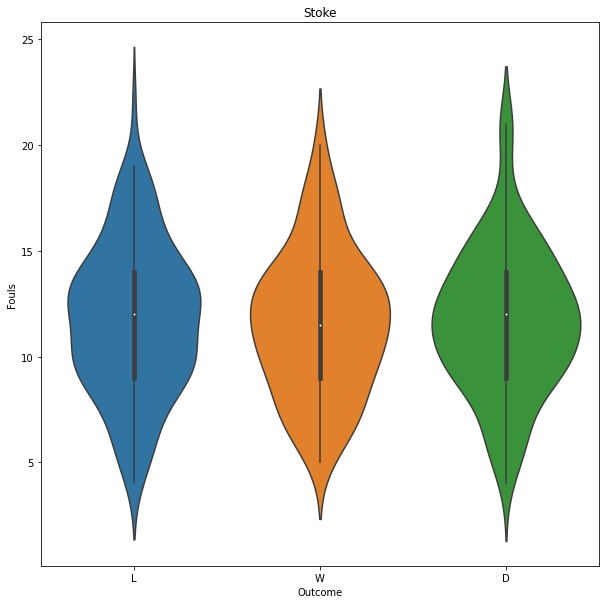

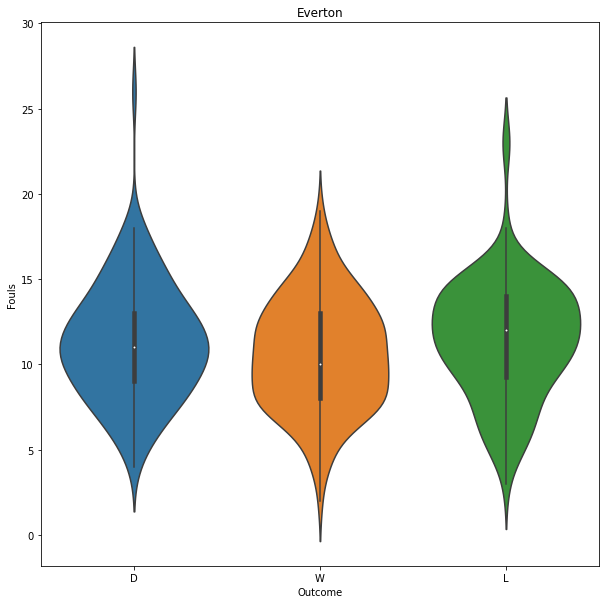

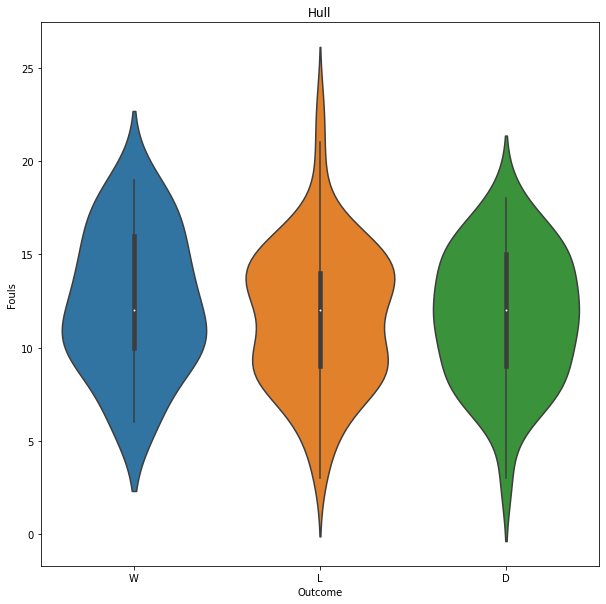

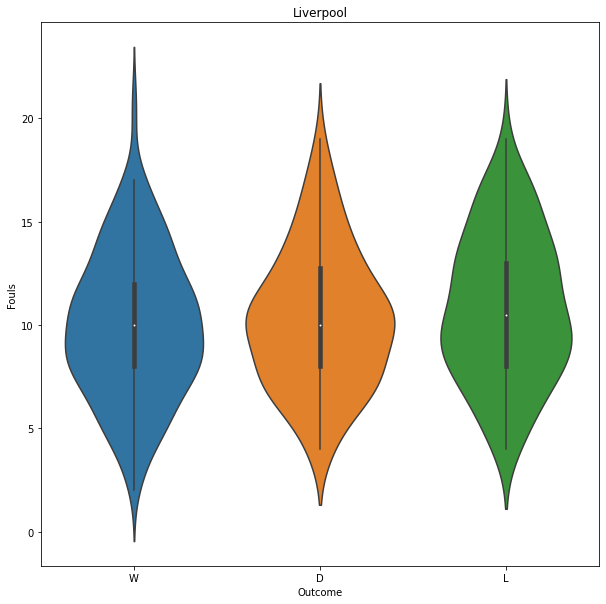

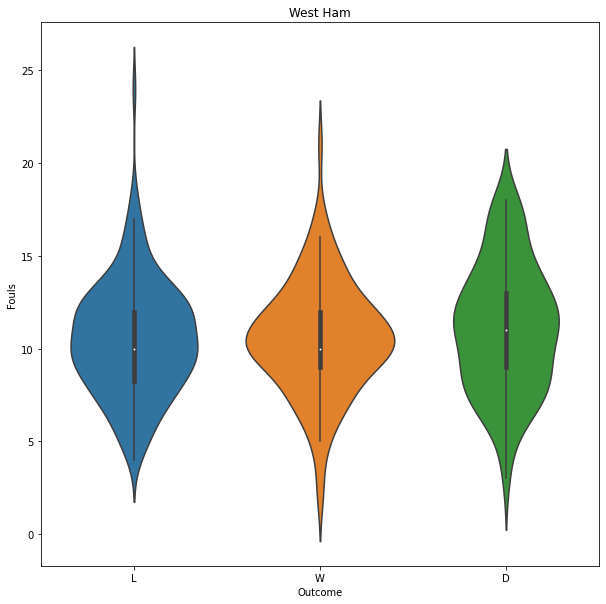

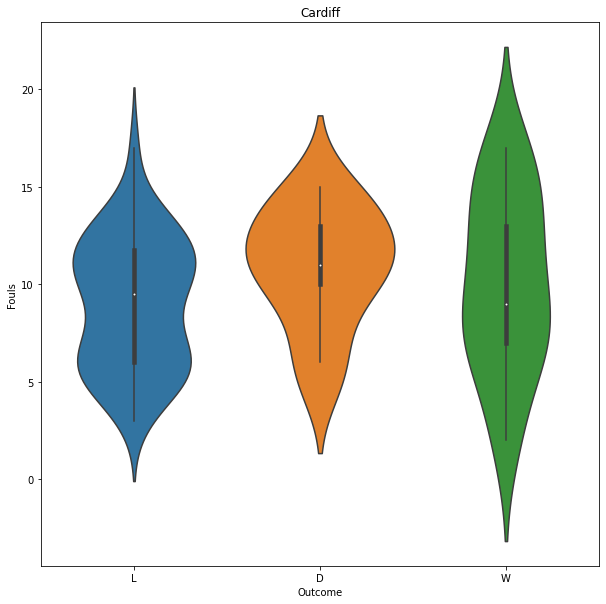

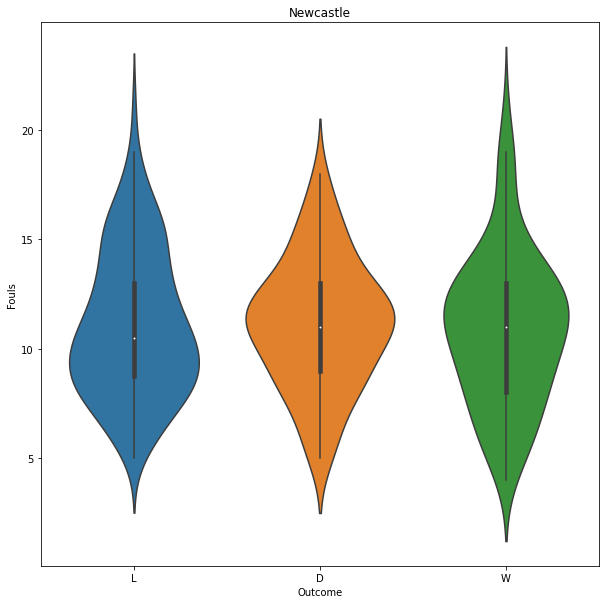

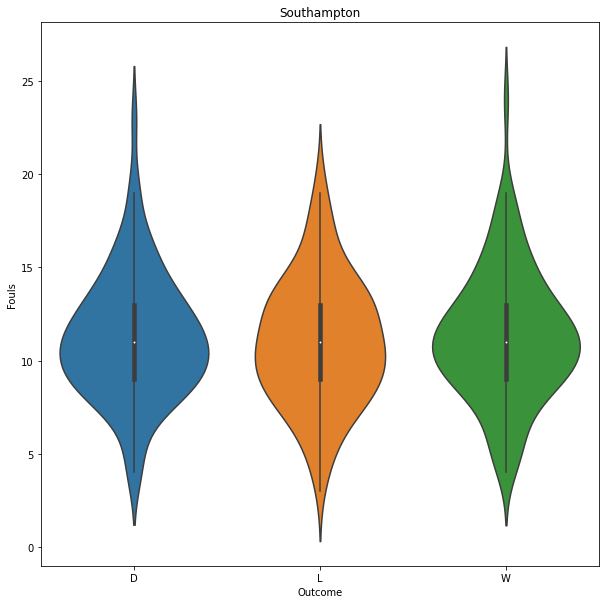

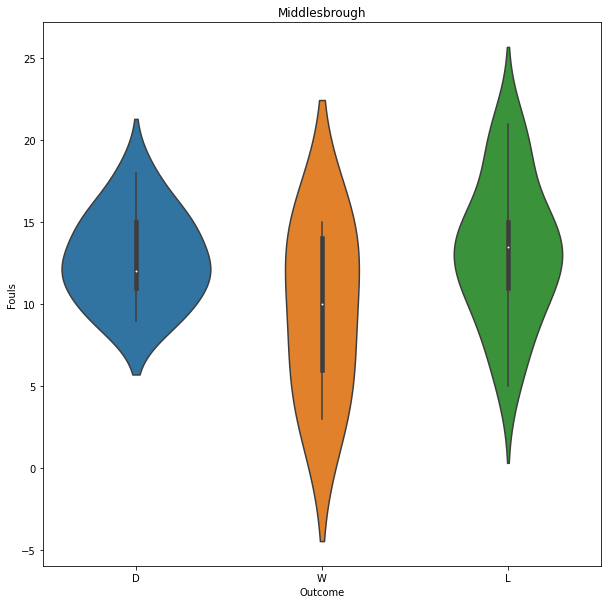

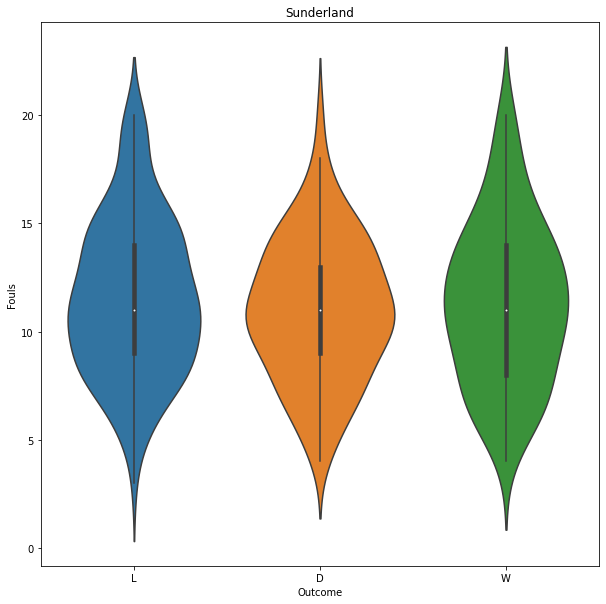

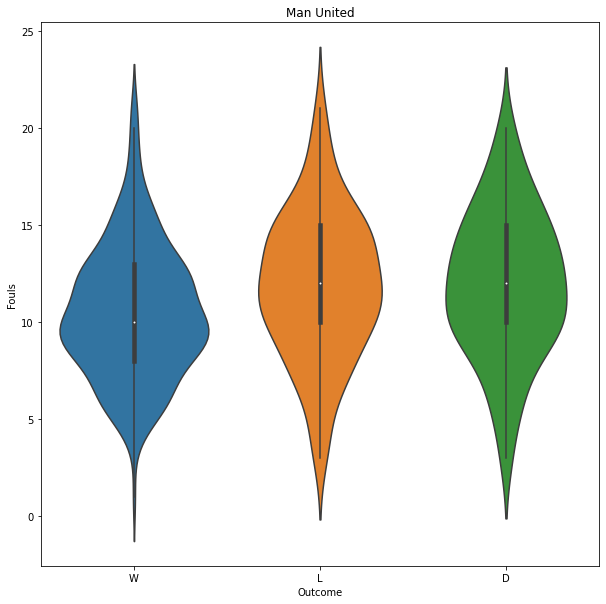

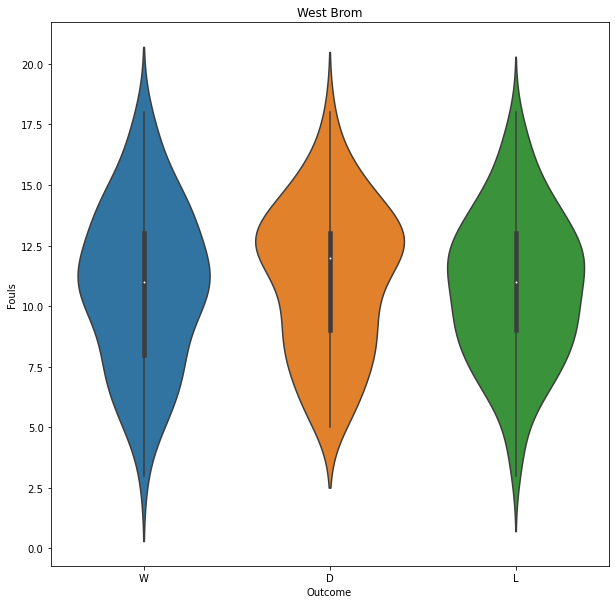

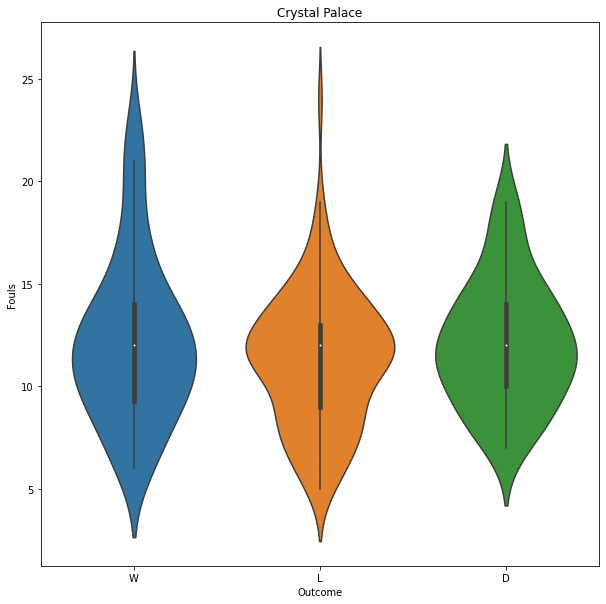

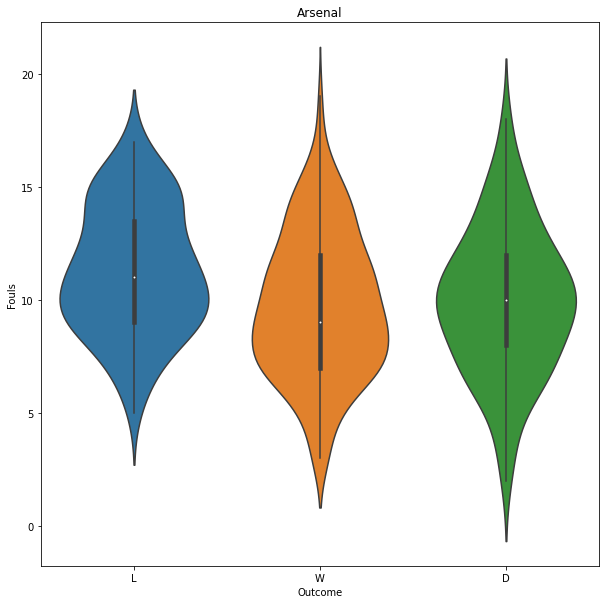

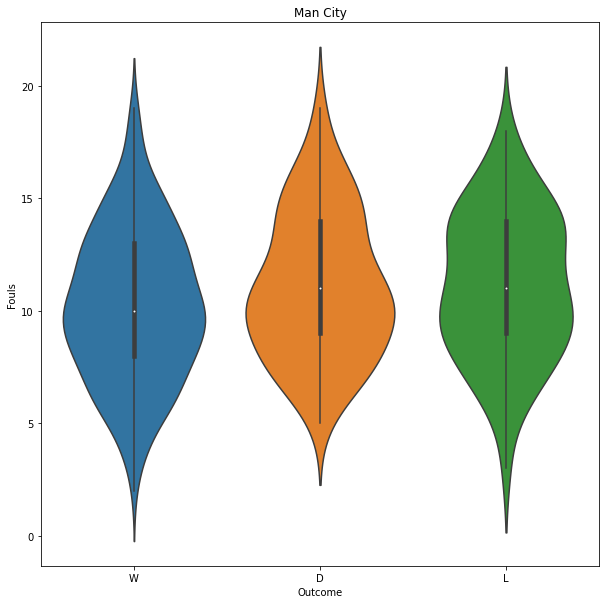

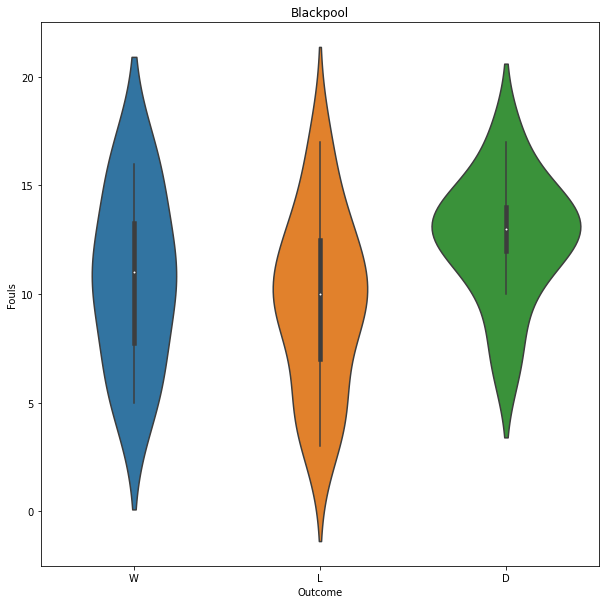

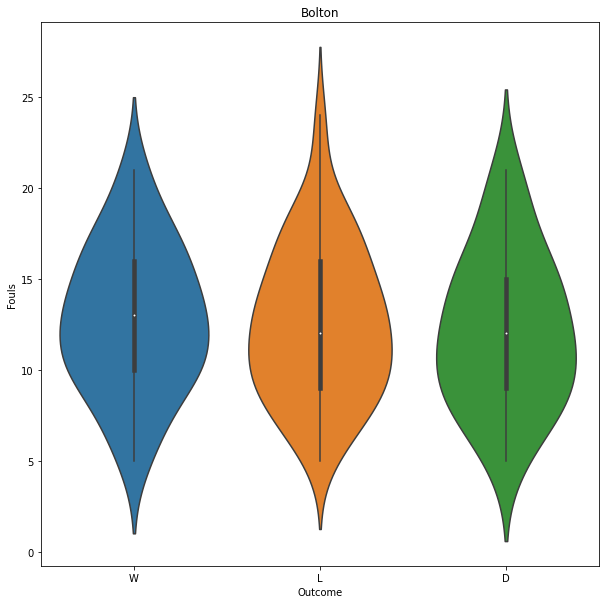

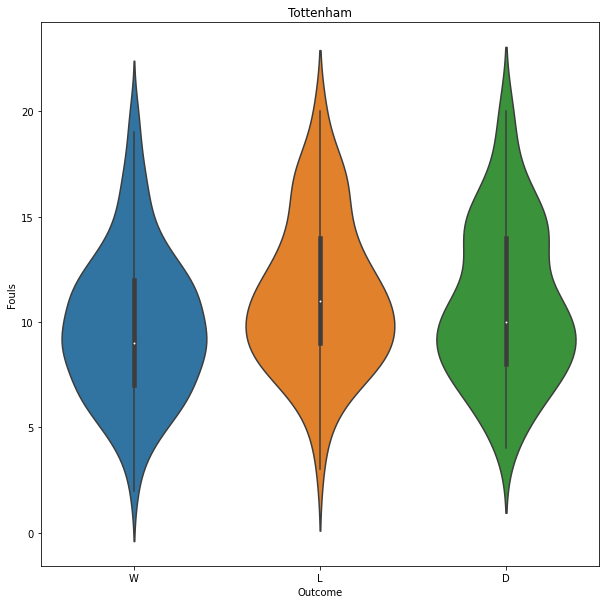

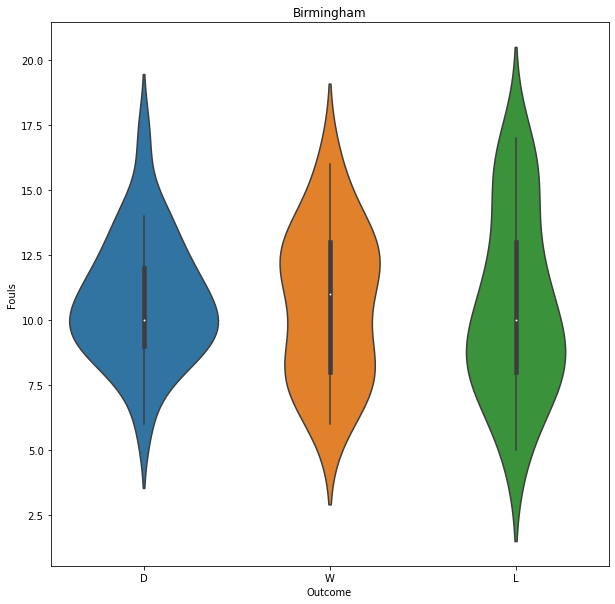

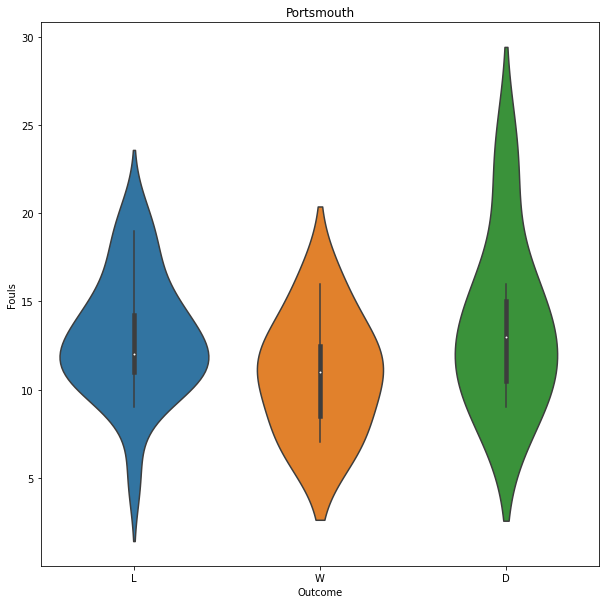

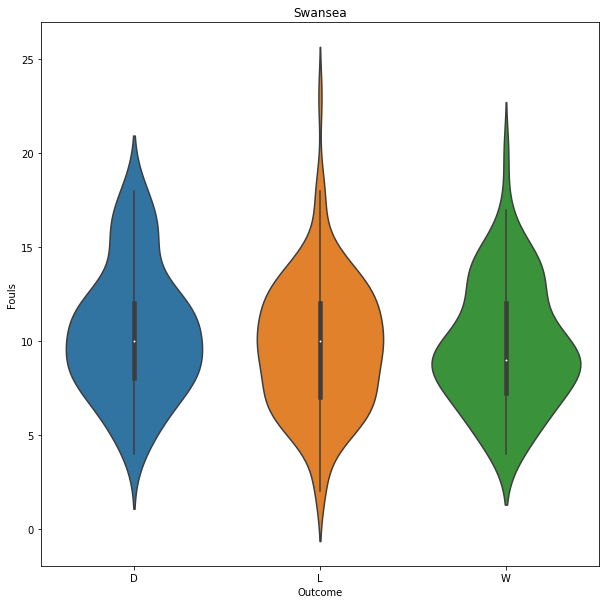

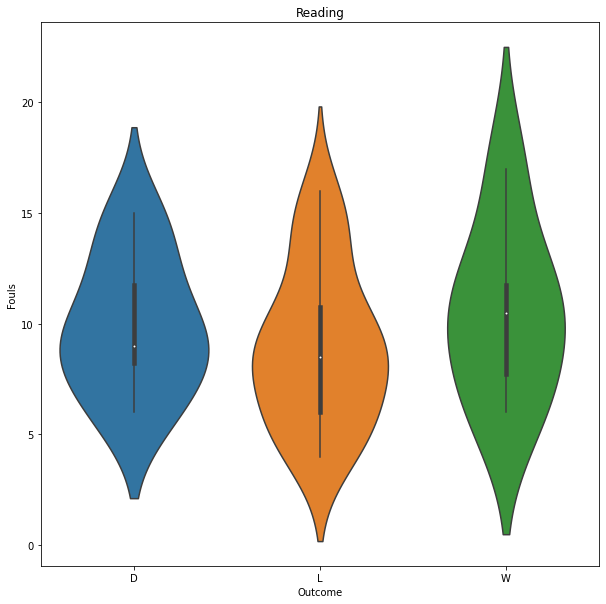

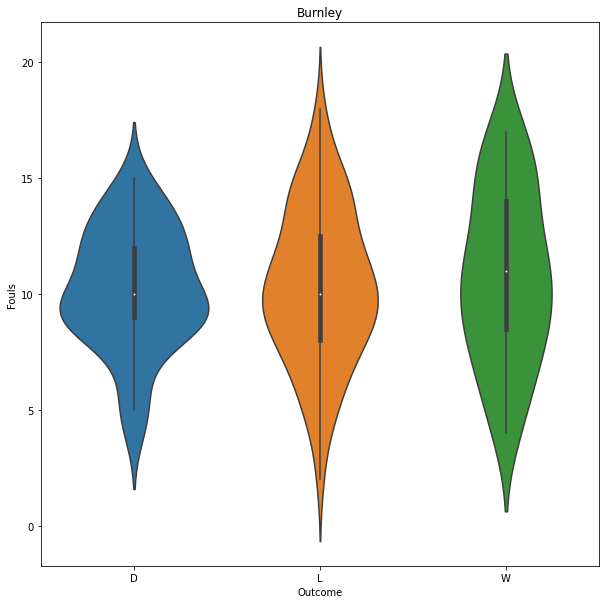

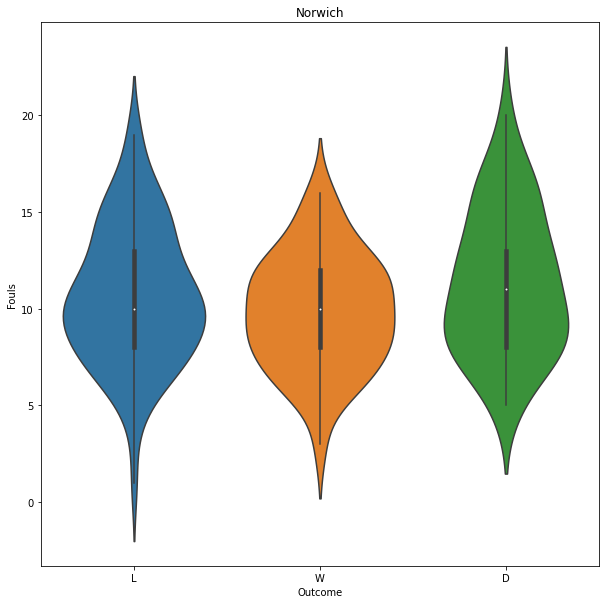

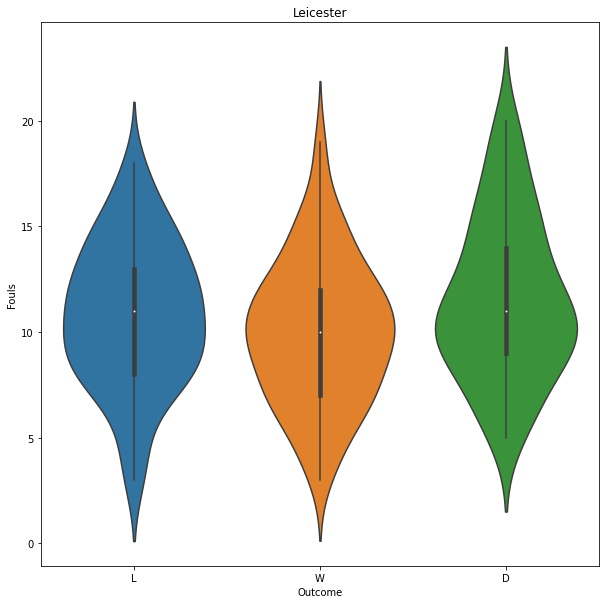

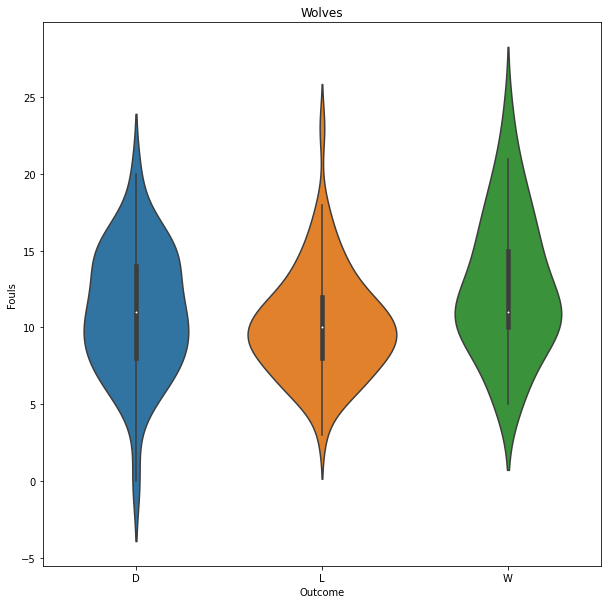

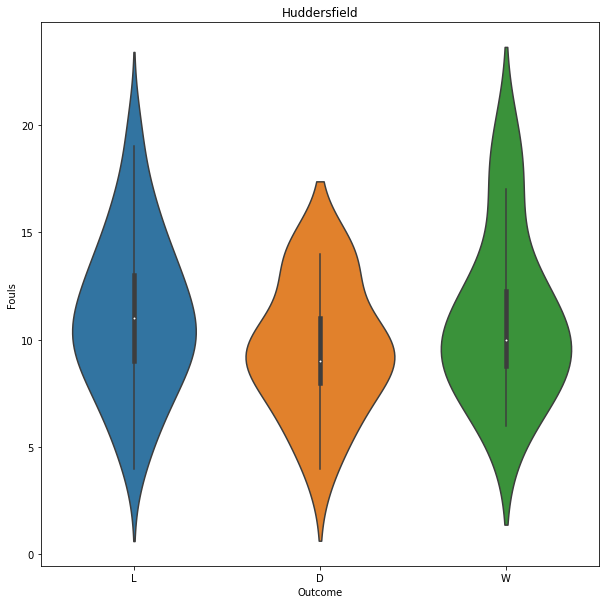

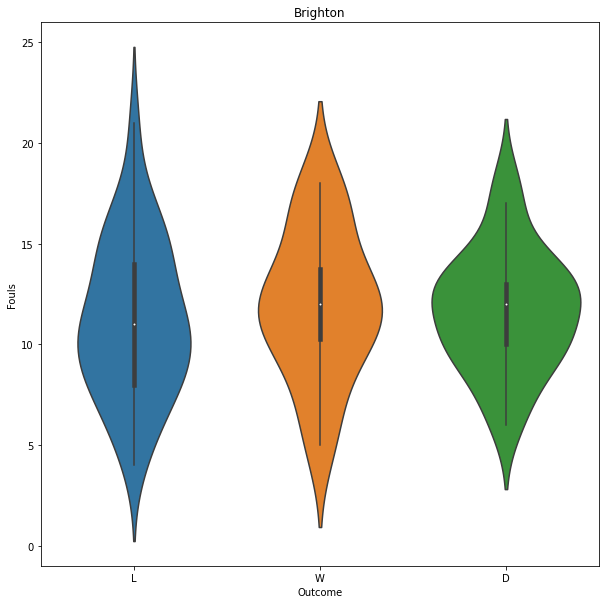

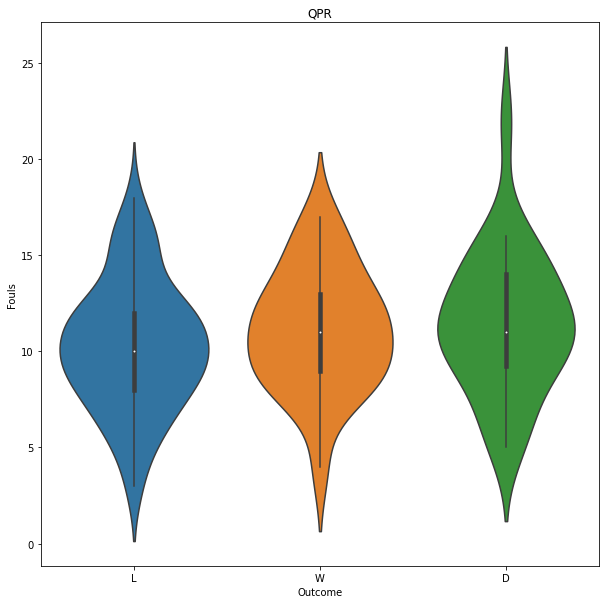

In [ ]:
for team in teams_df:  
    fig, ax = plt.subplots(figsize=(10,10))
    df = teams_df[team]
    ax = sns.violinplot(x = 'Outcome',y = 'Fouls', data=df)
    ax.set_title(team)

**Analysis of Violin Plots:**
Looking at the above plots, the overall idea we can get from them is that the data is approximately normally distributed. On almost every violin each one has its own peak, and no violin is very skewed to any side. Now that we know that the data seems to ber overall normally distributed, we are able to more confidentally use our key stats going forward.


*** Machine Learning and Hypothesis testing***

Our hypothesis is that we can accurtely predict the outcome of a game using our key stats of average number of fouls, shots on target, and average shots taken. We will now test whether these 3 elements can truly predict the outcome of the game, showing which team is most likely to come out on top. We will check if there is a linear coorelation between these sts and the team winning the game. 

We used the random forest Algorithm in order to make a prediction based off of average shots, and average shots on target, and number of fouls. The random forest algorithm builds many different decision trees and takes a majority vote off of them in regards to classification and average.



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


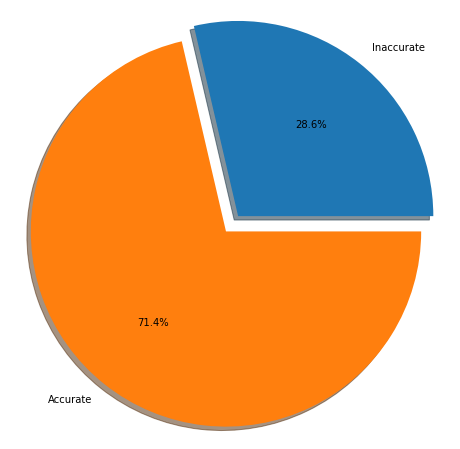

In [ ]:
accuracy_lst = []
win_ratio_lst = []

for team in teams_df:
  df = teams_df[team]
  df['Numerical Outcome'] = 0

for team in teams_df:
  df = teams_df[team]
  wins = 0
  total = len(df)
  X = []
  y = []

  for index, row in df.iterrows():
    SOT = row['Shots On Target']
    S = row['Shots']
    F = row['Fouls']
# adding certain points depending the number of shots taken, either 5 or 10
    if SOT >= 5 or S > 10:
      X.append([5])
    else:
      X.append([0]) 

    if row['Outcome'] == 'W':
      row['Numerical Outcome'] = 1 # Indicating a winning outcome
      y.append(1)
      wins += 1
    else:
      row['Numerical Outcome'] = 2 # Indicating a Draw or Loss Outcome
      y.append(2)


  win_ratio_lst.append(wins / total)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  forest = RandomForestClassifier(n_estimators=100)
  forest.fit(X_train, y_train)
  y_predict = forest.predict(X_test)

  accuracy = cross_val_score(forest, X, y, cv=10).mean()
  accuracy_lst.append(accuracy)

average_accuracy = np.array(accuracy_lst).mean()
sizes = [100 - (average_accuracy * 100), average_accuracy * 100]
explode = [0, 0.1]
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, explode=explode, labels=['Inaccurate', 'Accurate'], autopct= '%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()



The chart above is a pie graph showing the result of our algorithm. As shown our algorithim comes out to be 71.4% accurate, and 28.6% inaccurarate. Our machine learning algorthim comes out to be a 71.4% accurate, showing that nearly 3/4 of the time this algorthim can be used efficiently in making the predictions.

**Conclusion:**
The English Premier League is one of the mosty elite sporting leagues in the world. It is incredible how many stats we are abke to keep track of nowadays in the sport of soccer. Everything is being tracked, and every team wants to take full advantage of these advanced stats and increase there chances of winning. After narrowing down the numnerous stats to a few key ones, we wanted to understand how each of these stats impact the game. It was remarkable to see how much of an impact they have on the outcome of the game. 
These analyses can be very important for sports teams as they search for the most important stats to look at it, or to find the hidden gem stats that other teams aren't looking at. 

Useful Links: 
https://www.premierleague.com/premier-league-explained

https://help.vidswap.com/hc/en-us/articles/207646186-Abbreviations-In-Soccer-Stat-Sheets

https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/

https://www.bbc.co.uk/newsround/40891247

